

# Part 1: Explorative Data Analysis



## Import packages and dataset

In [ ]:
#!pip install geopandas
#!pip install folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.wkt import loads
import folium
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# read data
df = pd.read_excel('Louisana tank farms version 3.0.xlsm', sheet_name = 'Raw Data Louisiana')
# df  = pd.read_csv('/content/Copy of Louisana tank farms version 3.0.csv')

## Display general information

In [3]:
# basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44685 entries, 0 to 44684
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tank_id               44685 non-null  object        
 1   farm_type             44685 non-null  object        
 2   region                44685 non-null  object        
 3   imaging_time          44685 non-null  object        
 4   image_time_round_day  44685 non-null  datetime64[ns]
 5   max_vol               44685 non-null  float64       
 6   fill_pct              44685 non-null  float64       
 7   tank volume           44685 non-null  float64       
 8   scene_id              44685 non-null  object        
 9   provider_scene_id     44685 non-null  object        
 10  scene_source_id       44685 non-null  object        
 11  Location              44685 non-null  object        
 12  tank_id.1             44685 non-null  object        
 13  tank farm       

# Check missing values

In [4]:
# check for data missing
#result shows no missing value
df_check = df.isna().any()
print(df_check)

tank_id                 False
farm_type               False
region                  False
imaging_time            False
image_time_round_day    False
max_vol                 False
fill_pct                False
tank volume             False
scene_id                False
provider_scene_id       False
scene_source_id         False
Location                False
tank_id.1               False
tank farm               False
dtype: bool


## Drop duplicate rows

In [5]:
# drop columns that will not be used
df = df.drop(columns = ['region', 'provider_scene_id','scene_source_id','scene_id','tank_id.1'])
print(df.shape)

#drop duplicating rows: 480 rows
df.drop_duplicates(inplace = True)
print(df.shape)

(44685, 9)
(44205, 9)


In [6]:
# change imaging_time to datetime format
df["imaging_time"] = pd.to_datetime(df["imaging_time"])

# groupby tank_id and image_time_round_day,
# then select the newest time within a day for the same tank_id
df = df.loc[df.groupby(["tank_id", "image_time_round_day"])["imaging_time"].idxmax()]

# reset index of the dataset
df.reset_index(drop = True, inplace = True)

# drop imaging_time
df.drop(columns = ["imaging_time"], inplace = True)

# rename image_time_round_day
df.rename(columns = {"image_time_round_day": "date"}, inplace = True)

# make sure date is datetime format
df['date'] = pd.to_datetime(df['date'])
df

tank_id farm_type       date  \
0      0017ffca-6b06-4c8a-a787-7893441c3bf0  TERMINAL 2014-06-30   
1      0017ffca-6b06-4c8a-a787-7893441c3bf0  TERMINAL 2014-07-16   
2      0017ffca-6b06-4c8a-a787-7893441c3bf0  TERMINAL 2014-11-09   
3      0017ffca-6b06-4c8a-a787-7893441c3bf0  TERMINAL 2015-08-06   
4      0017ffca-6b06-4c8a-a787-7893441c3bf0  TERMINAL 2015-09-07   
...                                     ...       ...        ...   
39463  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-01-25   
39464  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-01-31   
39465  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-03   
39466  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-04   
39467  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-19   

            max_vol  fill_pct   tank volume  \
0      42886.151339  0.917884  39364.508191   
1      42886.151339  0.909515  39005.600951   
2      42886.151339  0.865952  37137.358670   
3      42886.151339  0.815761  34984.870314   
4      42886.151339  0.857732  36784.831747   
...             ...       ...           ...   
39463  31070.007304  0.268324   8336.822633   
39464  31070.007304  0.230752   7169.464154   
39465  31070.007304  0.231859   7203.846296   
39466  31070.007304  0.222294   6906.667067   
39467  31070.007304  0.269756   8381.327825   

                                        Location  tank farm  
0      POINT(-93.2766455411996 30.2389509161094)  undefined  
1      POINT(-93.2766455411996 30.2389509161094)  undefined  
2      POINT(-93.2766455411996 30.2389509161094)  undefined  
3      POINT(-93.2766455411996 30.2389509161094)  undefined  
4      POINT(-93.2766455411996 30.2389509161094)  undefined  
...                                          ...        ...  
39463            POINT(-93.32393972 30.17299683)       9648  
39464            POINT(-93.32393972 30.17299683)       9648  
39465            POINT(-93.32393972 30.17299683)       9648  
39466            POINT(-93.32393972 30.17299683)       9648  
39467            POINT(-93.32393972 30.17299683)       9648  

[39468 rows x 8 columns]

In [7]:
# delete undefined tank farm
df = df[df['tank farm'] !=  'undefined']
df

tank_id farm_type       date  \
42     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-01-22   
43     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-03-09   
44     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-03-30   
45     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-05-26   
46     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-10-20   
...                                     ...       ...        ...   
39463  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-01-25   
39464  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-01-31   
39465  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-03   
39466  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-04   
39467  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-19   

             max_vol  fill_pct    tank volume  \
42     245677.764314  0.471590  115859.131501   
43     245677.764314  0.879222  216005.218044   
44     245677.764314  0.380361   93446.193706   
45     245677.764314  0.815113  200255.192503   
46     245677.764314  0.348231   85552.710716   
...              ...       ...            ...   
39463   31070.007304  0.268324    8336.822633   
39464   31070.007304  0.230752    7169.464154   
39465   31070.007304  0.231859    7203.846296   
39466   31070.007304  0.222294    6906.667067   
39467   31070.007304  0.269756    8381.327825   

                              Location tank farm  
42     POINT(-89.96097005 29.92979202)      9325  
43     POINT(-89.96097005 29.92979202)      9325  
44     POINT(-89.96097005 29.92979202)      9325  
45     POINT(-89.96097005 29.92979202)      9325  
46     POINT(-89.96097005 29.92979202)      9325  
...                                ...       ...  
39463  POINT(-93.32393972 30.17299683)      9648  
39464  POINT(-93.32393972 30.17299683)      9648  
39465  POINT(-93.32393972 30.17299683)      9648  
39466  POINT(-93.32393972 30.17299683)      9648  
39467  POINT(-93.32393972 30.17299683)      9648  

[37529 rows x 8 columns]

## Detect outliers


In [8]:
# Columns to check for outliers
variables = ['tank volume', 'max_vol', 'fill_pct']

# Loop through each column to calculate and print the number of outliers
for col in variables:
    # Step 1: Calculate Q1 and Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Step 2: Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Step 3: Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 4: Identify outliers (values below lower bound or above upper bound)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Step 5: Print the number of outliers
    print(f"Total number of outliers in the '{col}' column: {outliers.shape[0]}")

Total number of outliers in the 'tank volume' column: 3377
Total number of outliers in the 'max_vol' column: 1956
Total number of outliers in the 'fill_pct' column: 0


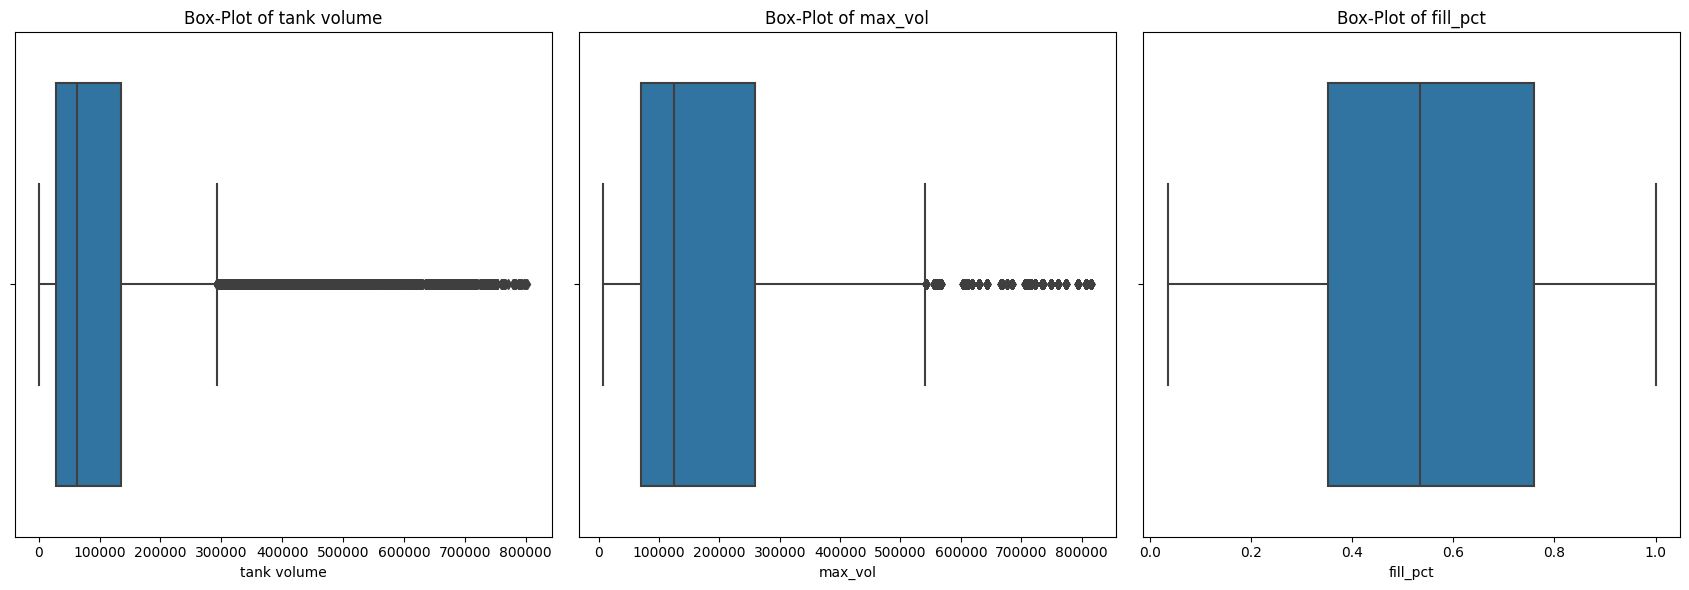

In [9]:
# Columns to plot

# Create subplots
fig, axes = plt.subplots(1, len(variables), figsize=(17, 6))

# Loop through columns and create boxplots
for i, col in enumerate(variables):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box-Plot of {col}')
    axes[i].set_xlabel(col)

# Adjust layout for better display
plt.tight_layout()
plt.show()

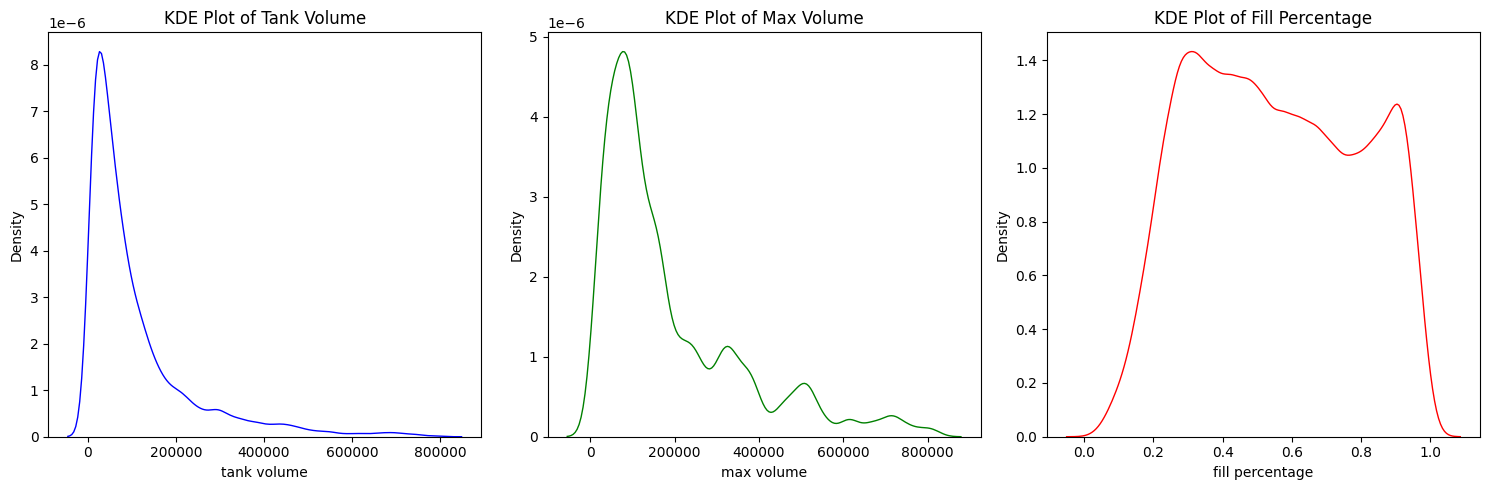

In [10]:
plt.figure(figsize=(15, 5))

# Plot for 'tank volume'
plt.subplot(1, 3, 1)
sns.kdeplot(df['tank volume'], color="blue", linewidth=1)
plt.xlabel("tank volume")
plt.ylabel("Density")
plt.title("KDE Plot of Tank Volume")

# Plot for 'max_vol'
plt.subplot(1, 3, 2)
sns.kdeplot(df['max_vol'], color="green", linewidth=1)
plt.xlabel("max volume")
plt.ylabel("Density")
plt.title("KDE Plot of Max Volume")

# Plot for 'fill_pct'
plt.subplot(1, 3, 3)
sns.kdeplot(df['fill_pct'], color="red", linewidth=1)
plt.xlabel("fill percentage")
plt.ylabel("Density")
plt.title("KDE Plot of Fill Percentage")

# Show the plot
plt.tight_layout()
plt.show()

# Delete the outliers




In [11]:
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower) & (df[column] <= upper)]


# df = remove_outliers_iqr(df, 'tank volume')
# df = remove_outliers_iqr(df, 'max_vol')
# df

## Encode farm type

In [12]:
df['farm_type_encoded'] = df['farm_type'].map({'REFINERY': 0, 'TERMINAL':1})
df

/var/folders/mr/_l_j5nx127x8yq0jv5bf0j_c0000gn/T/ipykernel_11153/1299834380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['farm_type_encoded'] = df['farm_type'].map({'REFINERY': 0, 'TERMINAL':1})


tank_id farm_type       date  \
42     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-01-22   
43     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-03-09   
44     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-03-30   
45     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-05-26   
46     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-10-20   
...                                     ...       ...        ...   
39463  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-01-25   
39464  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-01-31   
39465  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-03   
39466  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-04   
39467  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-19   

             max_vol  fill_pct    tank volume  \
42     245677.764314  0.471590  115859.131501   
43     245677.764314  0.879222  216005.218044   
44     245677.764314  0.380361   93446.193706   
45     245677.764314  0.815113  200255.192503   
46     245677.764314  0.348231   85552.710716   
...              ...       ...            ...   
39463   31070.007304  0.268324    8336.822633   
39464   31070.007304  0.230752    7169.464154   
39465   31070.007304  0.231859    7203.846296   
39466   31070.007304  0.222294    6906.667067   
39467   31070.007304  0.269756    8381.327825   

                              Location tank farm  farm_type_encoded  
42     POINT(-89.96097005 29.92979202)      9325                  0  
43     POINT(-89.96097005 29.92979202)      9325                  0  
44     POINT(-89.96097005 29.92979202)      9325                  0  
45     POINT(-89.96097005 29.92979202)      9325                  0  
46     POINT(-89.96097005 29.92979202)      9325                  0  
...                                ...       ...                ...  
39463  POINT(-93.32393972 30.17299683)      9648                  0  
39464  POINT(-93.32393972 30.17299683)      9648                  0  
39465  POINT(-93.32393972 30.17299683)      9648                  0  
39466  POINT(-93.32393972 30.17299683)      9648                  0  
39467  POINT(-93.32393972 30.17299683)      9648                  0  

[37529 rows x 9 columns]

## Statistical description after cleaning the data

In [13]:
# data statistical description
df[['max_vol', 'fill_pct', 'tank volume', 'farm_type_encoded']].describe()

max_vol      fill_pct    tank volume  farm_type_encoded
count   37529.000000  37529.000000   37529.000000       37529.000000
mean   188893.521588      0.552505  109432.694652           0.212263
std    172548.270787      0.236642  126432.257723           0.408915
min      7900.460745      0.035396     980.608068           0.000000
25%     69879.772489      0.352419   28709.470875           0.000000
50%    123953.366203      0.534017   63643.482056           0.000000
75%    258929.322146      0.758961  134567.866218           0.000000
max    816298.924484      1.000000  802565.065580           1.000000

## Plot correlation heatmap

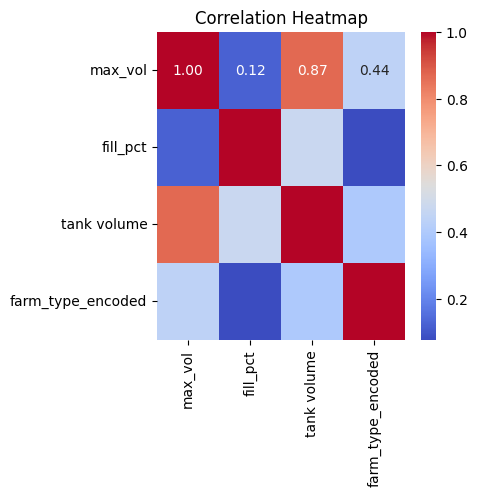

In [14]:
# select numeric columns
numeric_cols = df.select_dtypes(include='number')

# compute correlation matrix
corr_matrix = numeric_cols.corr()

# plot heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Tank farm & Tank id Analysis

In [15]:
# Group by 'tank farm' and count unique 'tank_id's in each farm
tank_farm_type = df.groupby('farm_type')['tank farm'].nunique()
tank_farm_id= df.groupby('tank farm')['tank_id'].nunique()
# Print the results
# Group by 'tank farm' and count unique 'tank_id's in each farm
tank_farm_type = df.groupby('farm_type')['tank farm'].nunique()
tank_farm_id= df.groupby('tank farm')['tank_id'].nunique()
# Print the results
print(tank_farm_type)
print('')
print('Total number of individual tanks in the tank farms')
print(tank_farm_id)

farm_type
REFINERY    13
TERMINAL    14
Name: tank farm, dtype: int64

Total number of individual tanks in the tank farms
tank farm
6635     1
6646    10
6647     6
6655     2
6670     1
6675     2
6676     2
6678     1
6685     5
6690     7
6697     3
8337    16
8346    35
8347    12
8426    76
8723    31
8816    77
8847    42
9123    35
9294    13
9325    49
9456    24
9457    21
9502     6
9526    57
9597    40
9648    67
Name: tank_id, dtype: int64


In [16]:
# Create a DataFrame mapping each tank farm ID to its corresponding tank type
tank_farm_to_type_df = df[['tank farm', 'farm_type']].drop_duplicates().reset_index(drop=True)
tank_farm_to_type_df

tank farm farm_type
0       9325  REFINERY
1       6685  TERMINAL
2       8723  REFINERY
3       8816  REFINERY
4       9597  REFINERY
5       8426  TERMINAL
6       8847  REFINERY
7       9123  REFINERY
8       9456  REFINERY
9       9526  REFINERY
10      9294  REFINERY
11      8337  REFINERY
12      8346  REFINERY
13      9457  TERMINAL
14      9648  REFINERY
15      8347  TERMINAL
16      9502  TERMINAL
17      6670  REFINERY
18      6690  TERMINAL
19      6646  TERMINAL
20      6635  TERMINAL
21      6655  TERMINAL
22      6676  TERMINAL
23      6647  TERMINAL
24      6697  TERMINAL
25      6675  TERMINAL
26      6678  TERMINAL

In [17]:
avg = []
for tank in df["tank_id"].unique():
    print(tank)
    print(len(df[df["tank_id"] == tank]['date'].unique()))
    avg.append(len(df[df["tank_id"] == tank]['date'].unique()))
    # print(df[df["tank_id"] == tank]["imaging_time"].unique())

00b5a68a-9cc8-48a1-a647-19e72634e80c
80
00d8f211-0c0f-48d8-877e-bc405db9cf2c
18
00daeac9-dfb4-4553-8438-7bcbb9fce649
56
0163732b-747d-4f23-8e27-02a9f8fab7b5
61
01e94384-1c51-4366-9bb7-0533e665095e
76
01f61098-6b34-40ea-8b55-7441d751d2b3
72
021ea50b-695a-4ae9-9fa4-97d5b26ae255
79
02512c89-4a60-4d0b-813d-98321ca3f98b
43
030e95b4-1bd0-4e4f-a025-225e9eed2ce0
41
0322518b-0c70-4935-97c8-10b337f4d07f
42
0348d023-8f50-4bcb-b88d-94b90130a5de
43
0377d152-4327-462f-80f3-879c0229cb58
65
037f9c2a-ff00-4b28-b153-599233e791fd
50
04bb3200-168d-4617-88f2-93cac3e73e90
80
05c103ba-5c29-44a1-b7f8-7b2fa08af798
77
06ec3aaa-75e6-40d6-81cf-187ea5b80283
63
07342964-c979-453a-9e8c-78ca1e8d868e
82
079012d2-2350-4727-89d1-864258833a0c
75
07a15f99-dd94-4c7b-9671-4441858ed9fc
83
082dc832-0355-4443-8d74-0bbe5a59ce23
76
083f56fa-04d3-4431-b826-f0c941acb6b4
58
087967dd-574f-41fd-b648-96dbbf2a626a
74
08c16fb7-c013-4648-b869-0ddfc3369e6f
81
08c5adaa-68f2-4392-9078-38c9e53f538b
74
09a1b1bb-1038-4806-bf3b-6a0206b562d9
82


78
6fc4e652-0912-45ce-83a5-d9f73cacc95e
76
6fe59861-d4d3-4d46-bec0-ff561f47a0ef
83
706f193c-4b08-4bbe-b91a-e8f92adaee46
77
708313a5-6692-42f7-b764-27300f4f006a
67
70d859bc-311e-45f3-ac61-465045abb025
43
727affbd-fca2-44c2-a4fb-0dcf44826904
80
73a60e1b-609f-4290-9f8c-cdbb5c584114
72
73a65e48-4050-4474-9f99-7f6c0ede1df3
77
73afdf92-6b7a-434c-ae89-e3c98580d313
65
73caddd7-eeb7-4f6e-b5f6-3891e89ee4e2
37
750ab7df-01c0-404f-9e7f-29c620006de6
68
75593e73-be4d-4d3b-9da9-20e83f58a87c
77
7559e632-cded-4cbf-945a-52ac1070ab23
69
75d8b3c2-084a-402f-a4f1-fd3cfd2f0366
64
7601ec12-7a29-4daa-a76a-a0f95dcb1590
81
767022bc-0144-4c40-a2f8-3a6c924e2bb6
74
7758d549-3cb7-49b0-8e8c-5db1631e0a12
83
77acba82-0ed5-427f-8f87-59d91a302235
42
781e69d4-2058-4593-a838-e738918e2567
81
7a102a32-9521-46bf-82a8-242fa249481b
83
7c34c63f-bb5a-4784-8778-ebc311607f53
11
7c8cfbba-1a62-427a-82fb-97cfabfc9ff5
17
7cda8d9f-a47b-4453-b250-cccb6598f304
39
7d345e2c-4235-4842-8ed6-3a166b0ddc52
65
7d7bb3dc-fb3c-4ce1-8280-8cad581b6adc


cca7e400-5827-46c2-86a4-87c25ed76c96
39
cdbfce90-b41a-4b99-8f09-03b9d38e5b5d
32
cddba253-450c-481a-8dfe-891f088333ef
80
ceb0aed5-84fd-486e-b0eb-b3fb72cb59a7
56
cf44eaa3-a2c9-4f41-85a3-20cfb76e3625
76
cf7d93f7-0497-4952-aad4-626c00e92162
37
cfa83bfe-7539-434c-8f66-c80d0bef6ca8
43
cfd45966-9649-4cbe-8630-c33f4824ebcd
66
d011b25c-8dde-4cbd-a415-3eafa5fa3ef2
76
d0606dba-b65b-406b-9cca-6388bf8c0be4
12
d0803ba8-992c-4e47-bb0c-07e28ac626dc
72
d0e4f1b8-3b22-4af6-a9b7-d78c928fe385
65
d0e5f7cf-dfff-4661-a2b1-1b9f7ce8fb31
39
d0fd81ac-d92b-49b6-a3bd-bfa68c3b6b7e
74
d14a38b4-5c33-41cf-96e8-e5553ebd0014
6
d3b5a624-499b-4fac-9397-f6b2729bf1da
62
d3bc41c6-e437-446d-ba48-61e3977a59ae
64
d429d42d-78bc-48bb-b19b-2530a06e1f31
52
d44388f3-1b1a-44fc-b2e9-45298d98e399
82
d5886af9-3744-434a-b610-54766b27ad25
43
d5a0f3d5-710a-4a8e-93e6-c7e611141144
59
d6048f04-4322-4d09-a82a-fe9474eca190
38
d60db884-034f-4cf6-9158-53101c8c46d0
52
d671c836-0193-471e-b001-22f210eebea4
66
d6fc92ad-4add-4f47-8773-40faf4172061
85
d

In [18]:
# Extract the year and month from the imaging_time column
df['year_month'] = df['date'].dt.to_period('M')

# Group by year_month and count unique images
unique_images_per_month = df.groupby('year_month')['tank farm'].nunique()

# Print the results
print(unique_images_per_month)

year_month
2014-01    10
2014-02     2
2014-03     9
2014-04     4
2014-05     6
2014-06     4
2014-07    13
2014-08     6
2014-10    11
2014-11     7
2014-12     8
2015-01     8
2015-02     7
2015-03     7
2015-04     2
2015-05     3
2015-07    12
2015-08    15
2015-09     8
2015-10    15
2015-11    13
2015-12    18
2016-01    19
2016-02    18
2016-03    15
2016-04    19
2016-05    16
2016-06     6
2016-07    14
2016-08    13
2016-09    16
2016-10    24
2016-11    22
2016-12    14
2017-01    22
2017-02    20
2017-03    16
2017-04    25
2017-05    12
2017-06    12
2017-07    11
2017-08     8
2017-09     3
2017-10    19
2017-11    24
2017-12    21
2018-01    22
2018-02    12
2018-03    22
2018-04     6
Freq: M, Name: tank farm, dtype: int64


/var/folders/mr/_l_j5nx127x8yq0jv5bf0j_c0000gn/T/ipykernel_11153/2654156813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['date'].dt.to_period('M')


In [19]:
print("Mean ",np.mean(avg))
print("Median ",np.median(avg))
print("Max ",np.max(avg))
print("Min ",np.min(avg))

Mean  58.54758190327613
Median  63.0
Max  85
Min  2


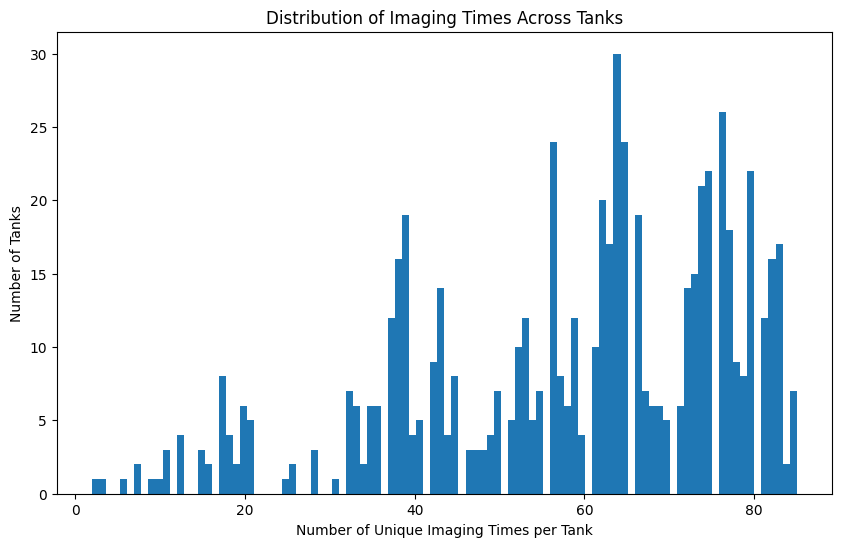

In [20]:
plt.figure(figsize=(10,6))
plt.hist(avg, bins=100)
plt.xlabel('Number of Unique Imaging Times per Tank')
plt.ylabel('Number of Tanks')
plt.title('Distribution of Imaging Times Across Tanks')
plt.show()

In [21]:
# Extract the year and month from the imaging_time column
df['year_month'] = df['date'].dt.to_period('M')

# Group by year_month and count unique images
unique_images_per_month = df.groupby('year_month')['tank farm'].nunique()

# Print the results
print(unique_images_per_month)

year_month
2014-01    10
2014-02     2
2014-03     9
2014-04     4
2014-05     6
2014-06     4
2014-07    13
2014-08     6
2014-10    11
2014-11     7
2014-12     8
2015-01     8
2015-02     7
2015-03     7
2015-04     2
2015-05     3
2015-07    12
2015-08    15
2015-09     8
2015-10    15
2015-11    13
2015-12    18
2016-01    19
2016-02    18
2016-03    15
2016-04    19
2016-05    16
2016-06     6
2016-07    14
2016-08    13
2016-09    16
2016-10    24
2016-11    22
2016-12    14
2017-01    22
2017-02    20
2017-03    16
2017-04    25
2017-05    12
2017-06    12
2017-07    11
2017-08     8
2017-09     3
2017-10    19
2017-11    24
2017-12    21
2018-01    22
2018-02    12
2018-03    22
2018-04     6
Freq: M, Name: tank farm, dtype: int64


/var/folders/mr/_l_j5nx127x8yq0jv5bf0j_c0000gn/T/ipykernel_11153/2654156813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['date'].dt.to_period('M')


In [22]:
# Compute the frequency of each tank farm
tank_farm_frequency = df['tank farm'].value_counts()

# Print the frequency of each tank farm
print("Frequency of each tank farm:")
print(tank_farm_frequency)

Frequency of each tank farm:
tank farm
8816    5459
8426    4441
9526    3913
9325    3659
9123    2839
8847    2634
9648    2370
8346    2207
9456    1727
8723    1686
9597    1653
9294    1090
9457    1068
8347     797
6646     501
9502     454
8337     311
6697     240
6647     101
6685      86
6690      80
6676      69
6655      66
6635      40
6670      15
6675      14
6678       9
Name: count, dtype: int64


In [23]:
# # Compute the frequency of each tank farm
# tank_farm_frequency = df['tank_farm'].value_counts()

# Identify the top 6 highest frequency tank farms
top_6_tank_farms = tank_farm_frequency.index

# Convert the imaging_time column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Initialize an empty DataFrame to store the comparison results
comparison_df = pd.DataFrame()

# Iterate over each year from 2014 to 2018
for year in range(2014, 2019):
    # Filter the data for the current year
    df_year = df[df['date'].dt.year == year]

    # Compute the frequency of the top 6 tank farms for the current year
    frequency_year = df_year[df_year['tank farm'].isin(top_6_tank_farms)]['tank farm'].value_counts()

    # Add the frequency data to the comparison DataFrame
    comparison_df[year] = frequency_year

# Fill NaN values with 0
comparison_df = comparison_df.fillna(0)

# Print the comparison DataFrame
print("Comparison of tank farm frequencies from 2014 to 2018:")
print(comparison_df)

Comparison of tank farm frequencies from 2014 to 2018:
           2014  2015  2016  2017   2018
tank farm                               
8816        532   574  1870  1751  732.0
9325        434   368  1326   997  534.0
8426        248   992  2192   936   73.0
9526        198   601  1779  1003  332.0
8346        131   131   771   706  468.0
8847        124   370   984   736  420.0
9294        124   104   424   295  143.0
9597        107   299   472   461  314.0
8723         90   424   424   509  239.0
9456         81   258   770   475  143.0
9648         66   245   859   761  439.0
9123         61   410  1253   817  298.0
6646         60    54    53   202  132.0
9457         59    61   500   307  141.0
8347         48    35   273   287  154.0
6647         34    18    31    18    0.0
6690         21    14    14    31    0.0
9502         17    66   220   121   30.0
8337         11    30    56    62  152.0
6685         10    15     4    52    5.0
6697          9    36   117    63   15.0
66

/var/folders/mr/_l_j5nx127x8yq0jv5bf0j_c0000gn/T/ipykernel_11153/411529828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


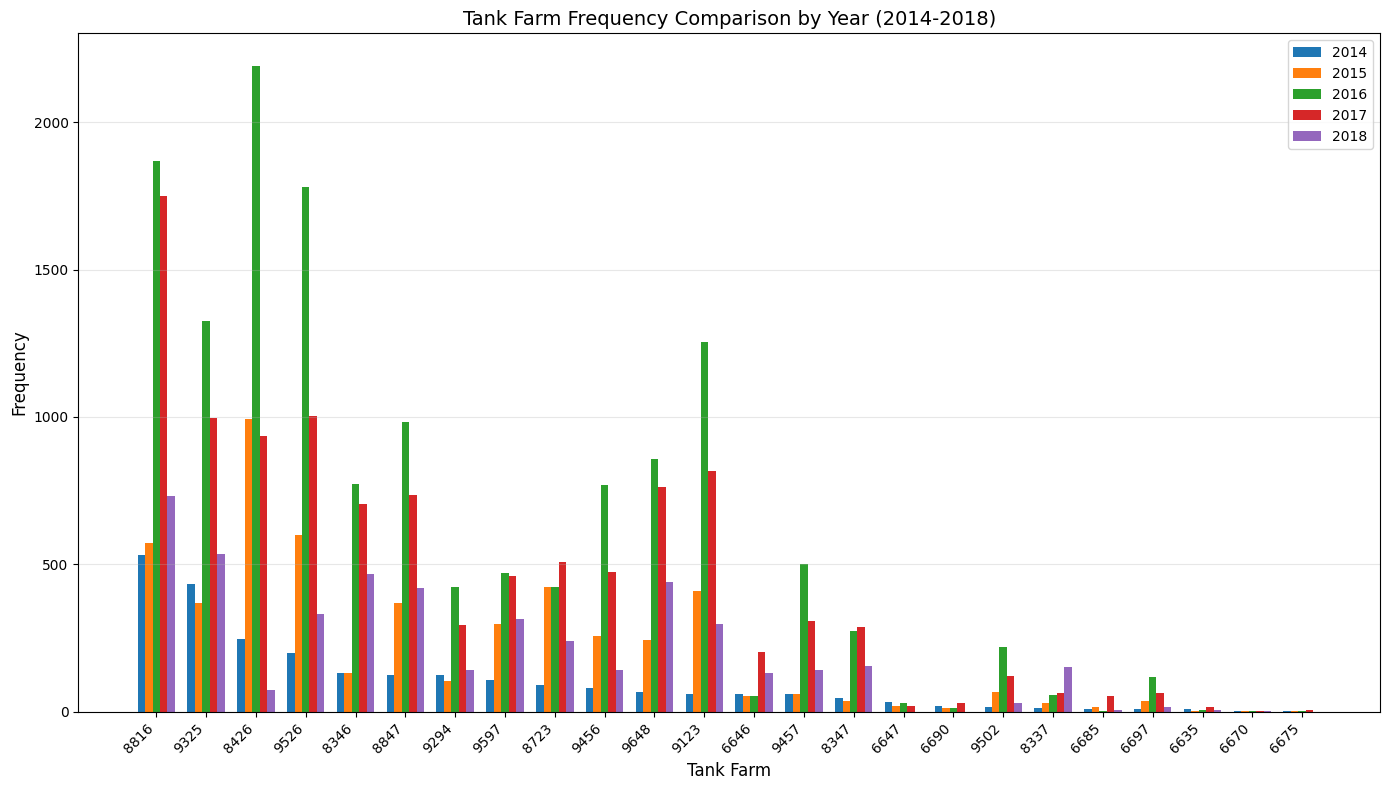

<Figure size 1400x800 with 0 Axes>

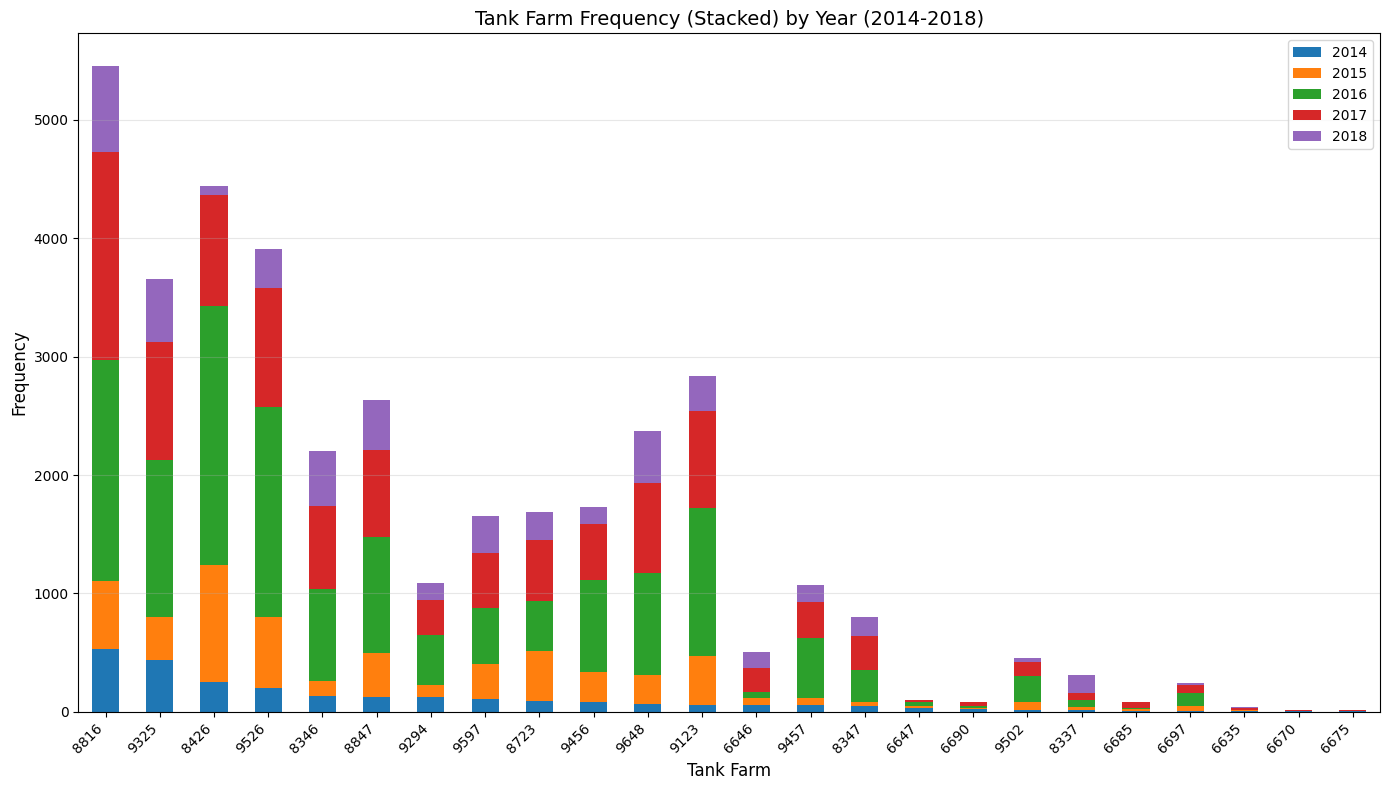

In [24]:
# After creating your comparison_df as shown above

# Create a plot
plt.figure(figsize=(14, 8))

# Set the positions for the bars
x = np.arange(len(comparison_df.index))
width = 0.15  # Width of each bar

# Plot bars for each year
for i, year in enumerate(range(2014, 2019)):
    plt.bar(x + (i - 2) * width, comparison_df[year], width, label=str(year))

# Add labels and legend
plt.xlabel('Tank Farm', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Tank Farm Frequency Comparison by Year (2014-2018)', fontsize=14)
plt.xticks(x, comparison_df.index, rotation=45, ha='right')
plt.legend()

# Add grid for readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()

# You can also create a stacked bar chart version
plt.figure(figsize=(14, 8))
comparison_df.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Tank Farm', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Tank Farm Frequency (Stacked) by Year (2014-2018)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# # For a heatmap visualization which might be clearer
# import seaborn as sns
# plt.figure(figsize=(12, 8))
# sns.heatmap(comparison_df, annot=True, cmap="YlGnBu", fmt='g')
# plt.title('Tank Farm Frequency Heatmap by Year (2014-2018)', fontsize=14)
# plt.tight_layout()
# plt.show()

In [25]:
# Initialize an empty DataFrame to store the comparison results
comparison_df = pd.DataFrame()

# Iterate over each year from 2014 to 2018
for year in range(2014, 2019):
    # Filter the data for the current year
    df_year = df[df['date'].dt.year == year]

    # Compute the frequency of each tank_id for the current year
    frequency_year = df_year['tank_id'].value_counts()

    # Add the frequency data to the comparison DataFrame
    comparison_df[year] = frequency_year

# Fill NaN values with 0
comparison_df = comparison_df.fillna(0)

# Print the comparison DataFrame
print("Comparison of tank_id frequencies from 2014 to 2018:")
print(comparison_df)

Comparison of tank_id frequencies from 2014 to 2018:
                                      2014  2015  2016  2017  2018
tank_id                                                           
00b5a68a-9cc8-48a1-a647-19e72634e80c    10   8.0  28.0  22.0  12.0
aaf04fde-4cfb-407e-8204-26e55a9ae801    10   7.0  30.0  22.0  12.0
7758d549-3cb7-49b0-8e8c-5db1631e0a12    10   9.0  30.0  22.0  12.0
5a7c2acd-e74e-4dcf-8da4-a525ae741835    10   7.0  30.0  22.0  12.0
b64d575c-600b-4106-bce4-d6a57665b437    10   8.0  28.0  21.0  12.0
...                                    ...   ...   ...   ...   ...
53ff5f01-8ff6-43b1-b8bc-e475553d90f2     1   4.0  14.0  12.0   7.0
537dda9e-177f-4ca5-82f7-accb4bdaf1bf     1   4.0  13.0  13.0   8.0
4ee01c84-af1f-4623-ad9b-260dbd1ae9d8     1   4.0  14.0  12.0   7.0
4e3f6c7b-e608-4130-8ed0-2627811ad177     1   2.0   3.0   3.0   6.0
ffda825a-86c2-4f36-b361-afe788a0b7e1     1   4.0  13.0  13.0   7.0

[612 rows x 5 columns]


In [26]:
# Print out the volume of each tank with respect to its tank ID
print("Tank ID | Volume")
print("-------|-------")

# Loop through each unique tank ID
for tank_id in df["tank_id"].unique():
    # Get the volume(s) for this tank ID
    # Assuming the volume is stored in a column called "max_vol"
    volumes = df[df["tank_id"] == tank_id]["max_vol"].unique()

    # Format and print the result
    volume_str = ", ".join(map(str, volumes))
    print(f"{tank_id} | {volume_str}")

Tank ID | Volume
-------|-------
00b5a68a-9cc8-48a1-a647-19e72634e80c | 245677.764313741
00d8f211-0c0f-48d8-877e-bc405db9cf2c | 130264.412298344
00daeac9-dfb4-4553-8438-7bcbb9fce649 | 164375.717130033
0163732b-747d-4f23-8e27-02a9f8fab7b5 | 105259.556617466
01e94384-1c51-4366-9bb7-0533e665095e | 100244.6550613
01f61098-6b34-40ea-8b55-7441d751d2b3 | 161867.274274991
021ea50b-695a-4ae9-9fa4-97d5b26ae255 | 84346.0549666606
02512c89-4a60-4d0b-813d-98321ca3f98b | 79002.3945255031
030e95b4-1bd0-4e4f-a025-225e9eed2ce0 | 22427.0030764183
0322518b-0c70-4935-97c8-10b337f4d07f | 92151.3750070945
0348d023-8f50-4bcb-b88d-94b90130a5de | 335827.180756337
0377d152-4327-462f-80f3-879c0229cb58 | 362015.698682779
037f9c2a-ff00-4b28-b153-599233e791fd | 55778.3736824886
04bb3200-168d-4617-88f2-93cac3e73e90 | 10086.9982614172
05c103ba-5c29-44a1-b7f8-7b2fa08af798 | 157908.573858333
06ec3aaa-75e6-40d6-81cf-187ea5b80283 | 97277.7097871848
07342964-c979-453a-9e8c-78ca1e8d868e | 54050.7917140174
079012d2-2350-472

475da290-458e-4e43-bdd9-c4b1b2b40769 | 210306.155157901
47a0346c-1789-4bd2-992f-831d87b3fe63 | 34486.6442292865
4891cbe9-c918-4afe-a55f-c6c31c0ae074 | 339349.979288464
48a04ecf-873c-4fdb-b210-29ea7e5ed2a4 | 643255.780372061
48dfcc71-be83-4152-9522-413374872bf4 | 498539.928736131
49bc3198-1a63-401d-af3f-b1b52b18c706 | 153765.757286424
49e98ea1-d1f4-4313-94c2-835648109bbd | 242140.30843233
4ae13b80-3b66-4cde-a2b8-f097d7855d97 | 235969.029201513
4b23fea2-9c60-4882-ad13-475658e7ff14 | 314295.136080046
4bb503b5-ff9e-4649-83cc-11e636a3131f | 256201.198465614
4c1663a8-1baf-44d3-a220-935394e16713 | 470650.611279322
4c3d8baa-c3bc-430c-8848-6aac40f22b29 | 109402.22661014
4c734140-df74-4626-b598-ad64f6951f0d | 313412.545764084
4c82be69-16c4-41c5-ae07-1b33bd210bd6 | 56657.822156489
4d14fe37-d8b8-4ff0-b542-b1e8697e7076 | 102309.432727064
4d159540-4099-46a7-8042-c90eb2130542 | 43070.2213798535
4d8618e7-d9e3-4563-8b2d-54e89205724e | 84893.3352335212
4e3f6c7b-e608-4130-8ed0-2627811ad177 | 47248.766582

9a66a02e-06f9-4c8a-a7c3-549fbdf9d70d | 247727.093811548
9b8a8e36-1a33-4ad4-8329-c8ec7c2ac144 | 27716.1458402883
9bd8a2b3-d284-46fe-a67a-7066b02d9506 | 395915.846215532
9d424ef4-36ef-4f42-867b-5b0e623da391 | 736532.078443381
9d5475ed-a01e-46e2-b159-5e68131abd2f | 62127.1550456331
9dce3f29-a674-4fe2-a566-85dc2946e534 | 211697.683941726
9e8739c6-d6d4-4204-9b37-6f40ddf18ba0 | 510824.51299145
9e9c9bbd-684b-4320-8368-28a232dc6e18 | 20096.2880557276
9edea7ec-9274-45f6-9588-80f4b41e994c | 221577.621716084
9f8a035f-c81b-4fff-8f59-de689923d6f2 | 29651.7784954691
9fa5095a-c7b0-49b8-b31d-1b1506b7527c | 711377.947502805
9fa6d59c-4071-4e0a-921e-4a3a03e73fd5 | 44665.3252186989
9fc9da31-3659-4e7e-a9ea-b4837ebafe43 | 254775.66433857
a00f7d99-783a-44d0-a2d6-b9f1f9b32d16 | 249303.085031729
a042103d-cb67-4389-9d3a-2337c1d9e424 | 135843.749649371
a074ca2b-a0ce-4154-8e18-b42bde04d37e | 296840.861819109
a19e2c06-95ce-4550-a9b0-b6383c051544 | 723407.24275808
a1d94979-5190-4414-b922-b7ecc4b8e67d | 79462.895676

e794f810-6781-40cc-a60f-f340e76d0344 | 516828.907200905
e87e0509-ee22-4696-8bab-b110b57aa292 | 84600.8682532923
e908a86a-e0c6-4b00-87d2-84cb3b36db37 | 134474.457230254
e92a7a59-d99f-4e14-9e94-9ea3bc2797a3 | 324770.792810325
e934641e-7c7c-4bf6-aa11-88f5d827300b | 115066.647836729
e94054ae-2d21-4129-a67b-d123f20017cb | 21610.5089164996
ea1b745e-21d8-4d17-9b47-b430b20892b2 | 117332.131632389
ea338c59-10c8-4953-bd51-021acedb6f1f | 209861.428900454
ea5fe91c-b1cd-4846-aa44-f9dcb1311f8c | 299875.94219615
ea8bdfe4-c947-454b-94f3-0942a18d92f8 | 58600.9688234841
eb26747e-5219-426c-8133-1d02cbef6a32 | 26162.8209107602
eba43844-feb8-4928-873f-d1d5f07ca323 | 54193.6630031842
ec95e542-aa16-49c1-9c96-07705b8f062d | 324769.105340184
eceb4ba0-39f1-4a1b-832e-9bbb8a609d1d | 507447.533702608
ed4f074a-26ba-46c3-904b-4eecbf78db7e | 154174.2152142
ef9caa78-6dae-4048-aa87-a097f796c3ab | 46646.75404662
f07ae6b1-7c4a-403d-9fae-a510c0cacfa2 | 79523.499061609
f0b0dbb1-67b8-4514-a290-5d4ac2c053b8 | 200342.89654021

In [27]:
# Calculate and print the total volume for each oil tank farm
print("Tank Farm | Total Volume")
print("----------|-------------")

# Assuming there's a column 'tank_farm' that identifies the farm each tank belongs to
# If your farm identifier column has a different name, replace 'tank_farm' with that name
for farm in df["tank farm"].unique():
    # Get all tanks in this farm
    farm_tanks = df[df["tank farm"] == farm]["tank_id"].unique()

    # Initialize total volume for this farm
    total_volume = 0

    # Sum the volume of each tank in this farm
    for tank in farm_tanks:
        # Get the volume for this tank (assuming it's in 'max_vol' column)
        tank_volume = df[df["tank_id"] == tank]["max_vol"].unique()[0]
        total_volume += tank_volume

    # Print the result
    print(f"{farm} | {total_volume}")

Tank Farm | Total Volume
----------|-------------
9325 | 6177292.580921743
6685 | 574881.7422794433
8723 | 2120466.2873214968
8816 | 13048067.582775276
9597 | 3583946.068854672
8426 | 30998813.205323998
8847 | 12699496.099742055
9123 | 6143386.609595363
9456 | 4764330.024007073
9526 | 4289314.424368069
9294 | 2315290.381809361
8337 | 704724.6238508179
8346 | 5676456.419219312
9457 | 2049744.5842688363
9648 | 9035237.957834471
8347 | 8582173.01853225
9502 | 456926.32548272284
6670 | 94014.0751544576
6690 | 659874.9835802979
6646 | 1551256.072316506
6635 | 29303.7585699274
6655 | 666735.217483151
6676 | 107949.1458039154
6647 | 841218.4169695189
6697 | 92290.00599999301
6675 | 152379.92282318382
6678 | 115066.647836729


In [28]:
# # Calculate total volume for each tank farm
# tank_farm_totals = df.groupby("tank farm")["max_vol"].sum()

# # Plot histogram
# plt.figure(figsize=(10, 6))
# #plt.bar(tank_farm_totals.index, tank_farm_totals.values, color='skyblue', edgecolor='black')
# tank_farm_totals.plot(kind = 'bar')
# # Labeling
# plt.xlabel("Tank Farm")
# plt.ylabel("Total Volume")
# plt.title("Total Volume Distribution Across Tank Farms")
# plt.xticks(rotation=45)  # Rotate x labels for better readability

# # Show plot
# plt.show()

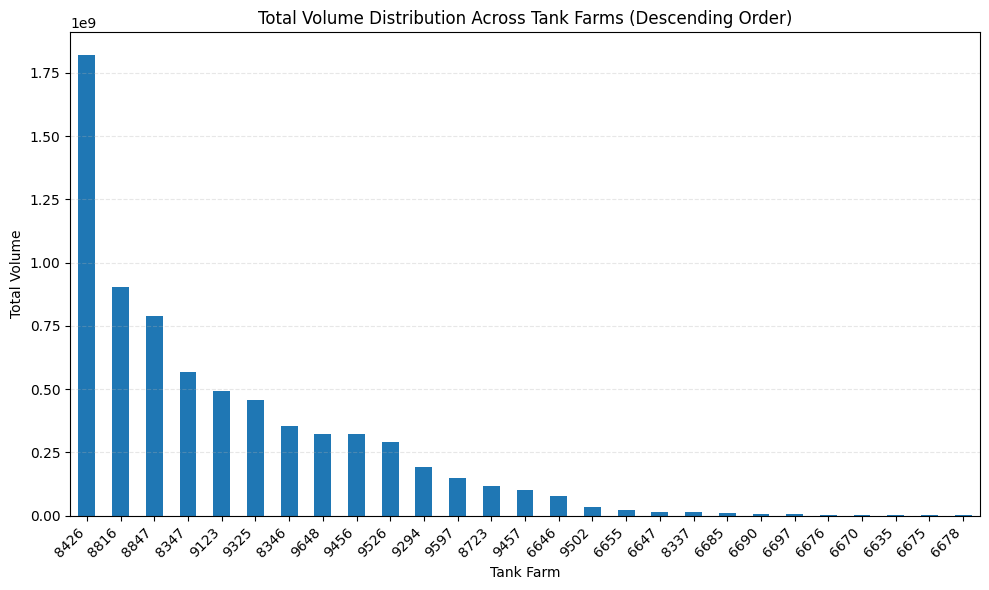

In [29]:
# Calculate total volume for each tank farm
tank_farm_totals = df.groupby("tank farm")["max_vol"].sum()

# Sort values in descending order
tank_farm_totals = tank_farm_totals.sort_values(ascending=False)

# Plot histogram
plt.figure(figsize=(10, 6))
#plt.bar(tank_farm_totals.index, tank_farm_totals.values, color='skyblue', edgecolor='black')
tank_farm_totals.plot(kind = 'bar')
# Labeling
plt.xlabel("Tank Farm")
plt.ylabel("Total Volume")
plt.title("Total Volume Distribution Across Tank Farms (Descending Order)")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# # Add values on top of each bar
# for i, v in enumerate(tank_farm_totals.values):
#     plt.text(i, v + (max(tank_farm_totals.values) * 0.01), f'{int(v):,}',
#              ha='center', fontweight='bold')

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show plot
plt.show()

In [30]:
# # Filter dataframe to only include tank farm 8426
# farm_8426_df = df[df['tank farm']== 8426]
# #print(farm_8426_df)

# # Count frequency of each tank ID in this farm
# tank_id_frequency = farm_8426_df['tank_id'].value_counts().sort_values(ascending=False)

# # Plot histogram of tank ID frequencies
# plt.figure(figsize=(12, 6))
# # plt.bar(tank_id_frequency.index.astype(str), tank_id_frequency.values,
# #        color='skyblue', edgecolor='black')

# tank_id_frequency.plot(kind = 'bar',color='skyblue', edgecolor='black')
# # Labeling
# plt.xlabel("Tank ID", fontsize=12)
# plt.ylabel("Frequency", fontsize=12)
# plt.title("Frequency of Tank IDs in Farm 8426", fontsize=14)
# plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75],
 [Text(0, 0, '39ba1a09-696c-4a08-9332-e8dbb863c7a3'),
  Text(1, 0, 'c4310b43-7281-40e7-8819-3b0f1ecca943'),
  Text(2, 0, '75d8b3c2-084a-402f-a4f1-fd3cfd2f0366'),
  Text(3, 0, '0e8d6d62-dc5a-49e8-aa59-7d11de21075e'),
  Text(4, 0, '9fa5095a-c7b0-49b8-b31d-1b1506b7527c'),
  Text(5, 0, '5938b76d-1684-4313-b290-3bd8b0acfae5'),
  Text(6, 0, 'dbf09fba-0755-41f6-8d06-232aac3375ae'),
  Text(7, 0, '7da17a66-6a07-4b11-b683-3bb21ad076d2'),
  Text(8, 0, '8234f5bb-fc5e-4283-a4e9-cd9c926496c0'),
  Text(9, 0, '1cd81278-9706-455a-bd47-9f93a582658c'),
  Text(10, 0,

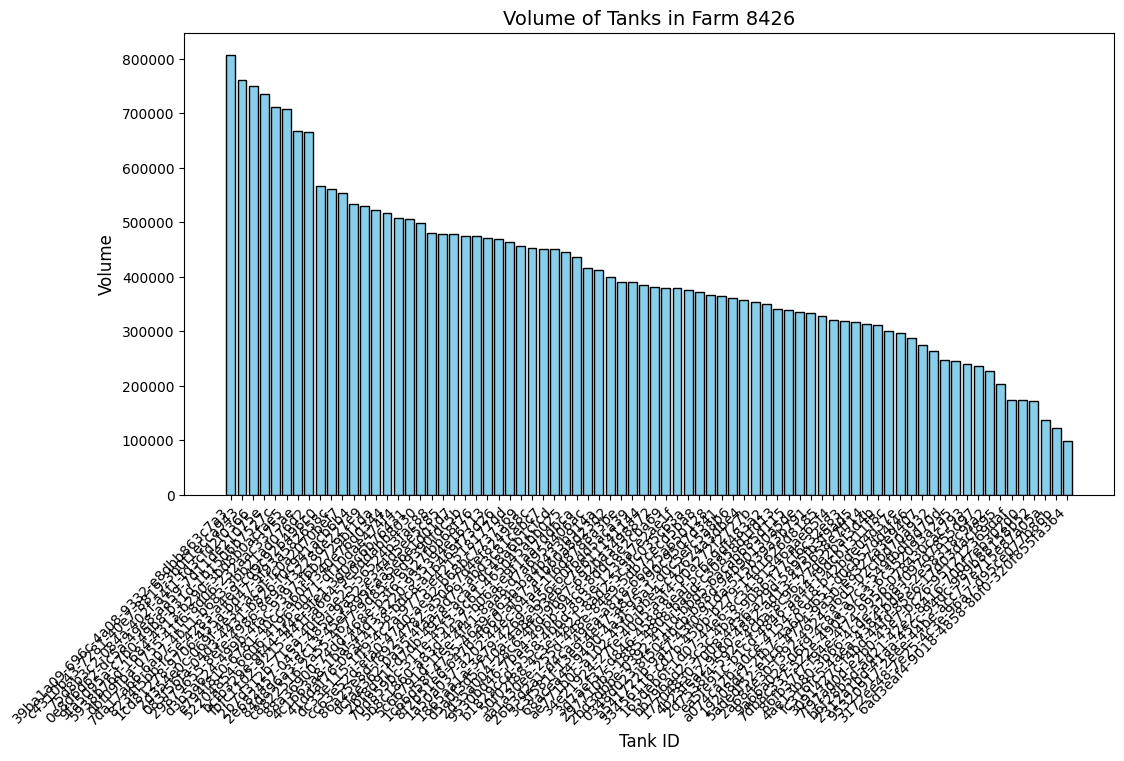

In [31]:
# Filter dataframe to only include tank farm 8426
farm_8426_df = df[df['tank farm'] == 8426]

# Calculate total volume for each tank ID in this farm
# For tank volume, we'll use the max_vol column
tank_volumes = farm_8426_df.groupby('tank_id')['max_vol'].first().sort_values(ascending=False)

# Plot histogram of tank volumes
plt.figure(figsize=(12, 6))
plt.bar(tank_volumes.index.astype(str), tank_volumes.values,
        color='skyblue', edgecolor='black')


# Labeling
plt.xlabel("Tank ID", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.title("Volume of Tanks in Farm 8426", fontsize=14)
plt.xticks(rotation=45, ha='right')

In [32]:
# Calculate frequency of each tank ID in the dataset
tank_freq = df.groupby(['tank farm', 'tank_id']).size().reset_index(name='frequency')

# Group by tank farm and calculate statistics
farm_stats = tank_freq.groupby('tank farm').agg(
    mean_frequency=('frequency', 'mean'),  # Average frequency of tanks
    variance=('frequency', 'var')  # Variance in frequencies
).reset_index()

# Sort by mean frequency (descending)
farm_stats = farm_stats.sort_values('mean_frequency', ascending=False)

# Display the results
print("Statistics for each tank farm:")
print(farm_stats)

# Optional: Save the results to a CSV file
farm_stats.to_csv('tank_farm_statistics.csv', index=False)

Statistics for each tank farm:
    tank farm  mean_frequency    variance
19       9294       83.846154    2.641026
18       9123       81.114286    3.868908
10       6697       80.000000    0.000000
23       9502       75.666667    3.466667
20       9325       74.673469  190.349490
21       9456       71.958333  106.215580
16       8816       70.896104   95.041695
24       9526       68.649123  170.910401
13       8347       66.416667    1.537879
12       8346       63.057143   33.231933
17       8847       62.714286   33.770035
14       8426       58.434211   37.528947
15       8723       54.387097   16.245161
22       9457       50.857143   29.828571
1        6646       50.100000    2.322222
25       9597       41.325000   19.968590
0        6635       40.000000         NaN
26       9648       35.373134   41.388964
6        6676       34.500000   12.500000
3        6655       33.000000    2.000000
11       8337       19.437500    2.929167
8        6685       17.200000    0.700000
2  

In [33]:
# Calculate frequency of each tank ID based on unique 'imaging_time' entries
tank_freq = df.groupby(['tank farm', 'tank_id'])['date'].nunique().reset_index(name='frequency')

# Group by tank farm and calculate statistics
farm_stats = tank_freq.groupby('tank farm').agg(
    mean_frequency=('frequency', 'mean'),  # Average frequency of tanks
    variance=('frequency', 'var')  # Variance in frequencies
).reset_index()

# Sort by mean frequency (descending)
farm_stats = farm_stats.sort_values('mean_frequency', ascending=False)

# Display the results
print("Statistics for each tank farm:")
print(farm_stats)

# # Optional: Save the results to a CSV file
# farm_stats.to_csv('tank_farm_statistics.csv', index=False)

Statistics for each tank farm:
    tank farm  mean_frequency    variance
19       9294       83.846154    2.641026
18       9123       81.114286    3.868908
10       6697       80.000000    0.000000
23       9502       75.666667    3.466667
20       9325       74.673469  190.349490
21       9456       71.958333  106.215580
16       8816       70.896104   95.041695
24       9526       68.649123  170.910401
13       8347       66.416667    1.537879
12       8346       63.057143   33.231933
17       8847       62.714286   33.770035
14       8426       58.434211   37.528947
15       8723       54.387097   16.245161
22       9457       50.857143   29.828571
1        6646       50.100000    2.322222
25       9597       41.325000   19.968590
0        6635       40.000000         NaN
26       9648       35.373134   41.388964
6        6676       34.500000   12.500000
3        6655       33.000000    2.000000
11       8337       19.437500    2.929167
8        6685       17.200000    0.700000
2  

In [34]:
# Calculate frequency of each tank ID based on unique 'imaging_time' entries
tank_freq = df.groupby(['tank farm', 'tank_id', 'farm_type'])['date'].nunique().reset_index(name='frequency')

# Group by tank farm and tank type, then calculate statistics
farm_stats = tank_freq.groupby(['tank farm', 'farm_type']).agg(
    num_tanks=('tank_id', 'count'),  # Number of unique tanks
    mean_frequency=('frequency', 'mean'),  # Average frequency of tanks
    variance=('frequency', 'var')  # Variance of frequencies across all tanks in the farm
).reset_index()

# Sort by mean frequency (descending)
farm_stats = farm_stats.sort_values('mean_frequency', ascending=False)

# Display the results
print("Statistics for each tank farm and tank type:")
print(farm_stats)

# Optional: Save the results to a CSV file
# farm_stats.to_csv('tank_farm_statistics.csv', index=False)

Statistics for each tank farm and tank type:
    tank farm farm_type  num_tanks  mean_frequency    variance
19       9294  REFINERY         13       83.846154    2.641026
18       9123  REFINERY         35       81.114286    3.868908
10       6697  TERMINAL          3       80.000000    0.000000
23       9502  TERMINAL          6       75.666667    3.466667
20       9325  REFINERY         49       74.673469  190.349490
21       9456  REFINERY         24       71.958333  106.215580
16       8816  REFINERY         77       70.896104   95.041695
24       9526  REFINERY         57       68.649123  170.910401
13       8347  TERMINAL         12       66.416667    1.537879
12       8346  REFINERY         35       63.057143   33.231933
17       8847  REFINERY         42       62.714286   33.770035
14       8426  TERMINAL         76       58.434211   37.528947
15       8723  REFINERY         31       54.387097   16.245161
22       9457  TERMINAL         21       50.857143   29.828571
1        6

Sorted Statistics for each tank farm:
    tank farm farm_type  num_tanks  mean_frequency    variance
19       9294  REFINERY         13       83.846154    2.641026
18       9123  REFINERY         35       81.114286    3.868908
10       6697  TERMINAL          3       80.000000    0.000000
23       9502  TERMINAL          6       75.666667    3.466667
20       9325  REFINERY         49       74.673469  190.349490
21       9456  REFINERY         24       71.958333  106.215580
16       8816  REFINERY         77       70.896104   95.041695
24       9526  REFINERY         57       68.649123  170.910401
13       8347  TERMINAL         12       66.416667    1.537879
12       8346  REFINERY         35       63.057143   33.231933
17       8847  REFINERY         42       62.714286   33.770035
14       8426  TERMINAL         76       58.434211   37.528947
15       8723  REFINERY         31       54.387097   16.245161
22       9457  TERMINAL         21       50.857143   29.828571
1        6646  TE

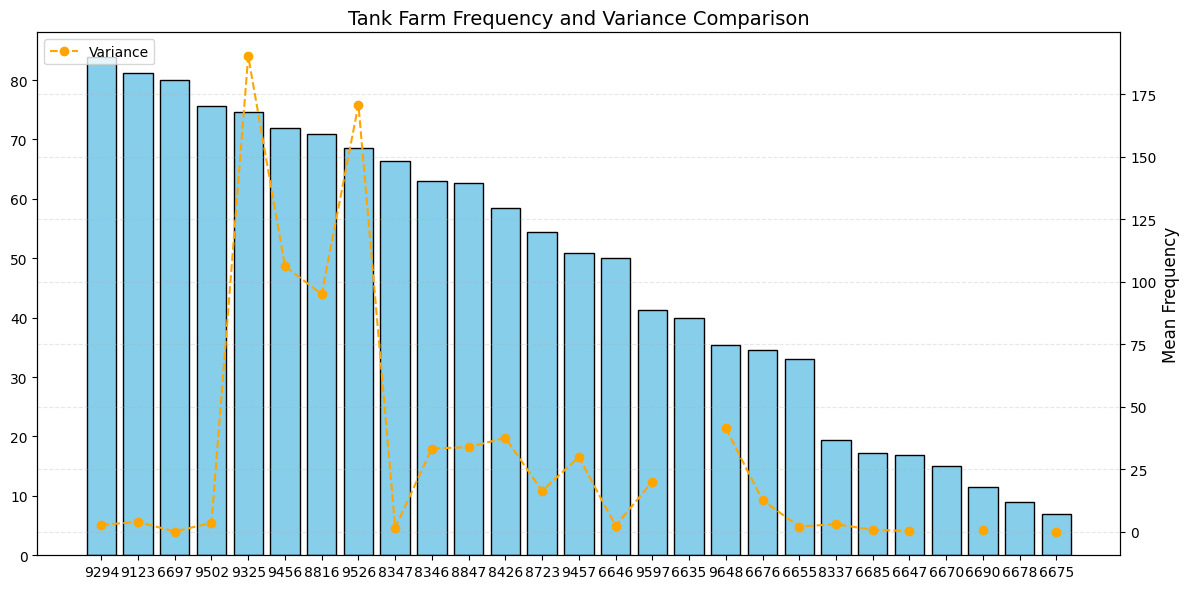

In [35]:
# Sort the farm statistics based on mean frequency and variance (first by mean, then by variance)
farm_stats_sorted = farm_stats.sort_values(by=['mean_frequency', 'variance'], ascending=[False, False])

# Display the sorted result
print("Sorted Statistics for each tank farm:")
print(farm_stats_sorted)

# Create a figure for visualization
plt.figure(figsize=(12, 6))

# Plot mean frequency and variance for each tank farm
# Use a bar plot for mean frequency
plt.bar(farm_stats_sorted['tank farm'].astype(str), farm_stats_sorted['mean_frequency'],
        color='skyblue', edgecolor='black', label='Mean Frequency')

# Use a second y-axis to plot variance
plt.twinx()
plt.plot(farm_stats_sorted['tank farm'].astype(str), farm_stats_sorted['variance'],
         color='orange', marker='o', label='Variance', linestyle='--')

# Labeling
plt.xlabel("Tank Farm", fontsize=12)
plt.ylabel("Mean Frequency", fontsize=12)
plt.title("Tank Farm Frequency and Variance Comparison", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Display legend
plt.legend(loc='upper left')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show plot
plt.show()

In [36]:
df

tank_id farm_type       date  \
42     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-01-22   
43     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-03-09   
44     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-03-30   
45     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-05-26   
46     00b5a68a-9cc8-48a1-a647-19e72634e80c  REFINERY 2014-10-20   
...                                     ...       ...        ...   
39463  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-01-25   
39464  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-01-31   
39465  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-03   
39466  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-04   
39467  ffda825a-86c2-4f36-b361-afe788a0b7e1  REFINERY 2018-03-19   

             max_vol  fill_pct    tank volume  \
42     245677.764314  0.471590  115859.131501   
43     245677.764314  0.879222  216005.218044   
44     245677.764314  0.380361   93446.193706   
45     245677.764314  0.815113  200255.192503   
46     245677.764314  0.348231   85552.710716   
...              ...       ...            ...   
39463   31070.007304  0.268324    8336.822633   
39464   31070.007304  0.230752    7169.464154   
39465   31070.007304  0.231859    7203.846296   
39466   31070.007304  0.222294    6906.667067   
39467   31070.007304  0.269756    8381.327825   

                              Location tank farm  farm_type_encoded year_month  
42     POINT(-89.96097005 29.92979202)      9325                  0    2014-01  
43     POINT(-89.96097005 29.92979202)      9325                  0    2014-03  
44     POINT(-89.96097005 29.92979202)      9325                  0    2014-03  
45     POINT(-89.96097005 29.92979202)      9325                  0    2014-05  
46     POINT(-89.96097005 29.92979202)      9325                  0    2014-10  
...                                ...       ...                ...        ...  
39463  POINT(-93.32393972 30.17299683)      9648                  0    2018-01  
39464  POINT(-93.32393972 30.17299683)      9648                  0    2018-01  
39465  POINT(-93.32393972 30.17299683)      9648                  0    2018-03  
39466  POINT(-93.32393972 30.17299683)      9648                  0    2018-03  
39467  POINT(-93.32393972 30.17299683)      9648                  0    2018-03  

[37529 rows x 10 columns]



# Explore location map

In [37]:
df_map = df[['tank_id', 'Location', 'tank farm']]
df_map

tank_id                         Location  \
42     00b5a68a-9cc8-48a1-a647-19e72634e80c  POINT(-89.96097005 29.92979202)   
43     00b5a68a-9cc8-48a1-a647-19e72634e80c  POINT(-89.96097005 29.92979202)   
44     00b5a68a-9cc8-48a1-a647-19e72634e80c  POINT(-89.96097005 29.92979202)   
45     00b5a68a-9cc8-48a1-a647-19e72634e80c  POINT(-89.96097005 29.92979202)   
46     00b5a68a-9cc8-48a1-a647-19e72634e80c  POINT(-89.96097005 29.92979202)   
...                                     ...                              ...   
39463  ffda825a-86c2-4f36-b361-afe788a0b7e1  POINT(-93.32393972 30.17299683)   
39464  ffda825a-86c2-4f36-b361-afe788a0b7e1  POINT(-93.32393972 30.17299683)   
39465  ffda825a-86c2-4f36-b361-afe788a0b7e1  POINT(-93.32393972 30.17299683)   
39466  ffda825a-86c2-4f36-b361-afe788a0b7e1  POINT(-93.32393972 30.17299683)   
39467  ffda825a-86c2-4f36-b361-afe788a0b7e1  POINT(-93.32393972 30.17299683)   

      tank farm  
42         9325  
43         9325  
44         9325  
45         9325  
46         9325  
...         ...  
39463      9648  
39464      9648  
39465      9648  
39466      9648  
39467      9648  

[37529 rows x 3 columns]

In [38]:
unique_tank_locations = df_map.drop_duplicates()
unique_tank_locations

tank_id  \
42     00b5a68a-9cc8-48a1-a647-19e72634e80c   
122    00d8f211-0c0f-48d8-877e-bc405db9cf2c   
140    00daeac9-dfb4-4553-8438-7bcbb9fce649   
196    0163732b-747d-4f23-8e27-02a9f8fab7b5   
289    01e94384-1c51-4366-9bb7-0533e665095e   
...                                     ...   
39163  ff3bbf36-2459-4a24-84fe-2583a6e01041   
39226  ff4296d5-2595-4aab-b351-485a79099ac8   
39289  ff87ee1c-fe36-4973-8336-ba81d7bc3184   
39365  ffb175c9-28dc-4950-939b-cdbd8bc1597d   
39430  ffda825a-86c2-4f36-b361-afe788a0b7e1   

                                  Location tank farm  
42         POINT(-89.96097005 29.92979202)      9325  
122    POINT(-90.9351071804 29.6302299535)      6685  
140        POINT(-91.74806828 30.52943254)      8723  
196        POINT(-90.40002949 30.01427499)      8816  
289        POINT(-90.39466131 29.99079221)      8816  
...                                    ...       ...  
39163      POINT(-90.59964716 30.05627706)      8847  
39226      POINT(-90.60082621 30.05343009)      8847  
39289       POINT(-90.3919822 29.99131648)      8816  
39365      POINT(-89.97659356 29.68280058)      8346  
39430      POINT(-93.32393972 30.17299683)      9648  

[641 rows x 3 columns]

In [39]:
unique_tank_locations['geometry'] = unique_tank_locations['Location'].apply(loads)
unique_tank_locations['lat'] = unique_tank_locations['geometry'].apply(lambda point: point.y)
unique_tank_locations['lon'] = unique_tank_locations['geometry'].apply(lambda point: point.x)

# Create a map and set the center point to the location of the first tank.
map_center = [unique_tank_locations['lat'].mean(), unique_tank_locations['lon'].mean()]
map_result = folium.Map(location=map_center, zoom_start=8)

# Generate a color mapping for tank farms.
tank_farms = unique_tank_locations['tank farm'].unique()
color_map = {farm: f'#{random.randint(0, 255):02x}{random.randint(0, 255):02x}{random.randint(0, 255):02x}' for farm in tank_farms}

# Add points to the map
for _, row in unique_tank_locations.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=color_map[row['tank farm']],
        fill=True,
        fill_color=color_map[row['tank farm']],
        fill_opacity=0.7,
        popup=f"Tank ID: {row['tank_id']}<br>Tank Farm: {row['tank farm']}"
    ).add_to(map_result)

# show the map
map_result

/var/folders/mr/_l_j5nx127x8yq0jv5bf0j_c0000gn/T/ipykernel_11153/4049673694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_tank_locations['geometry'] = unique_tank_locations['Location'].apply(loads)
/var/folders/mr/_l_j5nx127x8yq0jv5bf0j_c0000gn/T/ipykernel_11153/4049673694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_tank_locations['lat'] = unique_tank_locations['geometry'].apply(lambda point: point.y)
/var/folders/mr/_l_j5nx127x8yq0jv5bf0j_c0000gn/T/ipykernel_11153/4049673694.py:

Lets look at the name of the tank farm id because having tank farm id is not very nice but having the names of the tanks may be better for us

In [40]:
# Get the first occurrence of each unique tank farm with their corresponding latitude and longitude
print(unique_tank_locations)
first_occurrence_tank_farms = unique_tank_locations.drop_duplicates(subset='tank farm', keep='first')

# Select only the relevant columns: 'tank farm', 'lat', and 'lon'
first_occurrence_tank_farms = first_occurrence_tank_farms[['tank farm','lat', 'lon']]

# Print the resulting table
print(first_occurrence_tank_farms)

                                    tank_id  \
42     00b5a68a-9cc8-48a1-a647-19e72634e80c   
122    00d8f211-0c0f-48d8-877e-bc405db9cf2c   
140    00daeac9-dfb4-4553-8438-7bcbb9fce649   
196    0163732b-747d-4f23-8e27-02a9f8fab7b5   
289    01e94384-1c51-4366-9bb7-0533e665095e   
...                                     ...   
39163  ff3bbf36-2459-4a24-84fe-2583a6e01041   
39226  ff4296d5-2595-4aab-b351-485a79099ac8   
39289  ff87ee1c-fe36-4973-8336-ba81d7bc3184   
39365  ffb175c9-28dc-4950-939b-cdbd8bc1597d   
39430  ffda825a-86c2-4f36-b361-afe788a0b7e1   

                                  Location tank farm  \
42         POINT(-89.96097005 29.92979202)      9325   
122    POINT(-90.9351071804 29.6302299535)      6685   
140        POINT(-91.74806828 30.52943254)      8723   
196        POINT(-90.40002949 30.01427499)      8816   
289        POINT(-90.39466131 29.99079221)      8816   
...                                    ...       ...   
39163      POINT(-90.59964716 30.05627706) 

In [41]:
uni_tank_locations = unique_tank_locations.copy()
uni_tank_locations['tank farm'] = uni_tank_locations['tank farm'].astype(str)

DataFrame Shape: (641, 6)
Original number of classes: 27
Number of classes after filtering: 20
Classes to be dropped (less than 5 samples): ['6697', '6655', '6676', '6675', '6670', '6635', '6678']
Train set size: 440
Test set size: 189
 KNN GridSearchCV completed
Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best Cross-Validated Accuracy: 1.0

 [Best KNN Model] Test Set Accuracy: 1.0000
[Best KNN] Classification Report:
              precision    recall  f1-score   support

        6646       1.00      1.00      1.00         3
        6647       1.00      1.00      1.00         2
        6685       1.00      1.00      1.00         1
        6690       1.00      1.00      1.00         2
        8337       1.00      1.00      1.00         5
        8346       1.00      1.00      1.00        11
        8347       1.00      1.00      1.00         4
        8426       1.00      1.00      1.00        23
        8723       1.00      1.00      1.00         9
        8816   

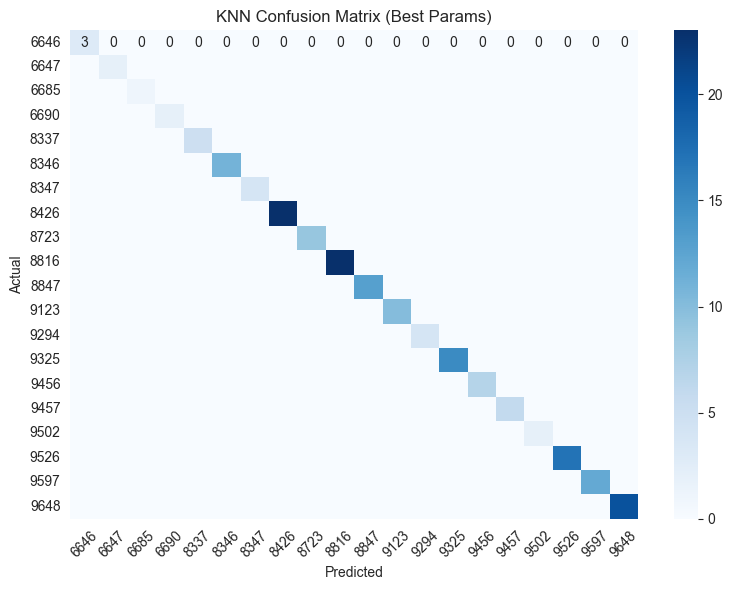

 Logistic Regression GridSearchCV completed
Best Parameters: {'C': 1.0}
Best Cross-Validated Accuracy: 0.6477184481098375
[Logistic Regression] Accuracy on Test Set: 0.6508
[Logistic Regression] Classification Report:
              precision    recall  f1-score   support

        6646       0.00      0.00      0.00         3
        6647       0.00      0.00      0.00         2
        6685       0.00      0.00      0.00         1
        6690       0.00      0.00      0.00         2
        8337       1.00      1.00      1.00         5
        8346       0.73      1.00      0.85        11
        8347       0.00      0.00      0.00         4
        8426       0.61      1.00      0.75        23
        8723       1.00      1.00      1.00         9
        8816       0.59      1.00      0.74        23
        8847       0.00      0.00      0.00        13
        9123       0.00      0.00      0.00        10
        9294       0.00      0.00      0.00         4
        9325       0.79  

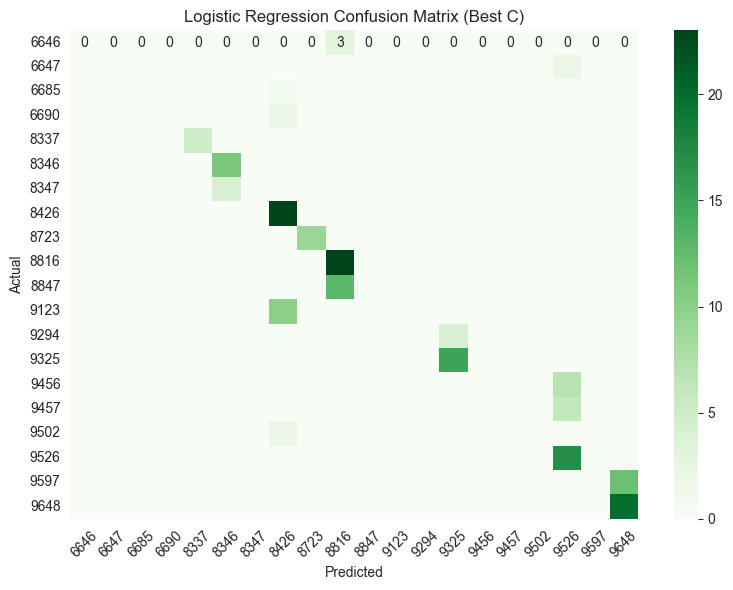

/var/folders/mr/_l_j5nx127x8yq0jv5bf0j_c0000gn/T/ipykernel_11153/2650415888.py:186: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(all_labels))


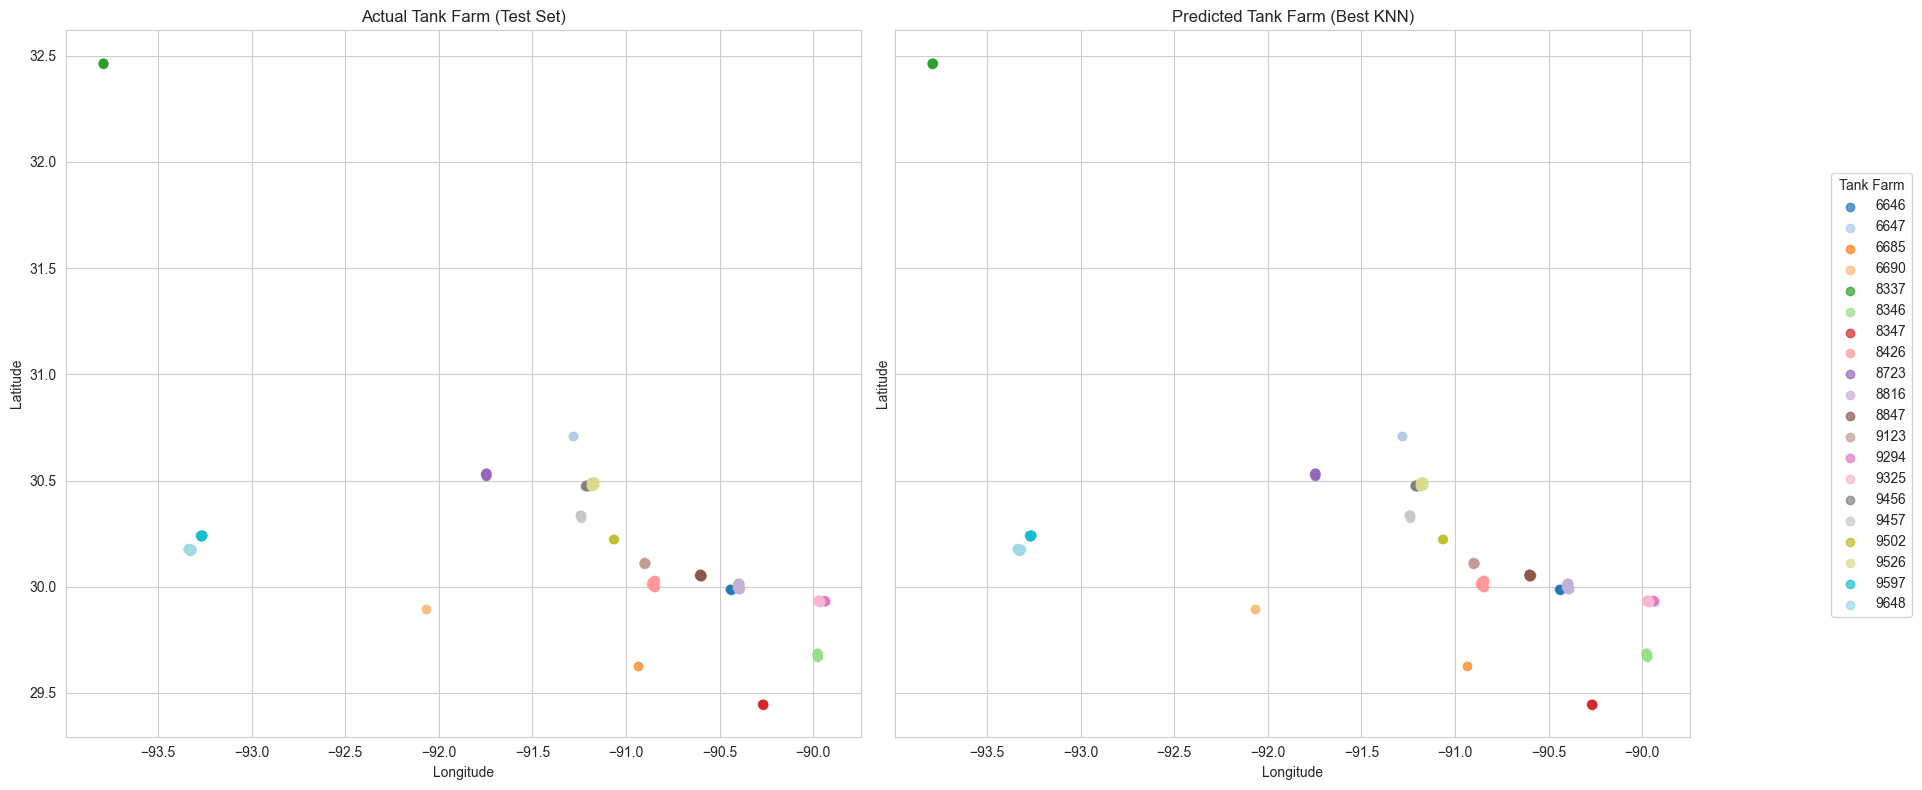

Predictions saved to test_predictions.csv
========== AUC (KNN) ==========
KNN Micro-Average AUC: 1.0000
========== AUC (Logistic Regression) ==========
LR Micro-Average AUC: 0.9659
KNN Macro-Average AUC: 1.0000
LR  Macro-Average AUC: 0.9796


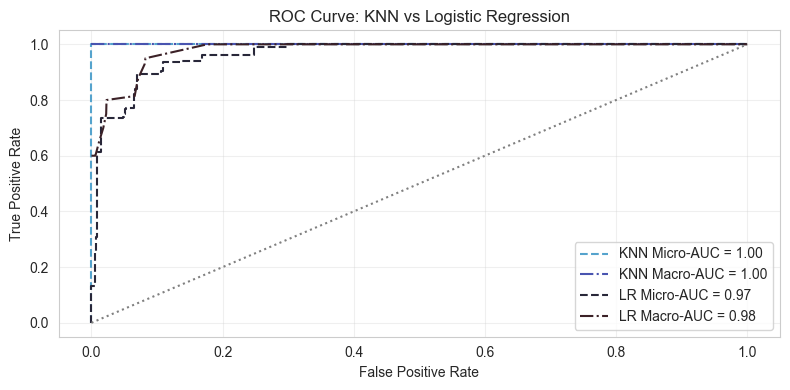

In [63]:
uni_tank_locations = unique_tank_locations.copy()
uni_tank_locations['tank farm'] = uni_tank_locations['tank farm'].astype(str)

import pandas as pd
import numpy as np

# Machine learning models and methods
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Evaluation metrics and visualization
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

#############################################################
# 2. Load data
#############################################################
df_loc = uni_tank_locations.copy()

# View dataset overview
print("DataFrame Shape:", df_loc.shape)

#############################################################
# 3. Data cleaning and preprocessing
#############################################################
# Drop rows with missing values in key columns
df_loc = df_loc.dropna(subset=['lat', 'lon', 'tank farm'])

# Convert 'tank farm' to string to avoid it being treated as continuous
df_loc['tank farm'] = df_loc['tank farm'].astype(str)

# Filter out lat/lon values that are out of valid ranges
df_loc = df_loc[
    (df_loc['lat'].between(-90, 90)) &
    (df_loc['lon'].between(-180, 180))
]

print("Original number of classes:", uni_tank_locations['tank farm'].nunique())
df_loc = df_loc[df_loc['tank farm'].map(df_loc['tank farm'].value_counts()) >= 5]
print("Number of classes after filtering:", df_loc['tank farm'].nunique())

vc = uni_tank_locations['tank farm'].value_counts()
to_drop = vc[vc < 5].index
print("Classes to be dropped (less than 5 samples):", list(to_drop))

df_loc = df_loc[~df_loc['tank farm'].isin(to_drop)]

#############################################################
# 4. Feature / Label setup
#############################################################
# Use lat and lon as features
X = df_loc[['lat', 'lon']]
y = df_loc['tank farm']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify = y,
    random_state=42
)

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

#############################################################
# 5. Feature scaling (optional, helps some models)
#############################################################
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training set
X_test_scaled  = scaler.transform(X_test)       # Transform test set


#############################################################
# 6. KNN model
#############################################################
# GridSearchCV instead of bootstrap (KNN)
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

print(" KNN GridSearchCV completed")
print("Best Parameters:", grid_search_knn.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_knn.best_score_)

# Evaluation on test set
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test_scaled)
acc_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"\n [Best KNN Model] Test Set Accuracy: {acc_best_knn:.4f}")
print("[Best KNN] Classification Report:")
print(classification_report(y_test, y_pred_best_knn, zero_division=0))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_best_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_knn,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.title("KNN Confusion Matrix (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



#############################################################
# 7. Logistic Regression GridSearchCV
#############################################################
lr = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
param_grid_lr = {
    'C': [0.01, 0.1, 1.0]
}

grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)

print(" Logistic Regression GridSearchCV completed")
print("Best Parameters:", grid_search_lr.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_lr.best_score_)

# Evaluation on test set
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"[Logistic Regression] Accuracy on Test Set: {acc_lr:.4f}")
print("[Logistic Regression] Classification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.title("Logistic Regression Confusion Matrix (Best C)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



#############################################################
# 8. Visualization - Compare actual vs. predicted distribution
#############################################################

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# All classes that appeared (actual or predicted)
all_labels = sorted(set(y_test.unique()) | set(np.unique(y_pred_best_knn)))

# Assign a unique color to each class
colors = cm.get_cmap('tab20', len(all_labels))
color_map = {label: colors(i) for i, label in enumerate(all_labels)}

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

# ========== Left: Actual classes ==========
for label in all_labels:
    subset = X_test[y_test == label]
    axes[0].scatter(
        subset['lon'], subset['lat'],
        label=label,
        alpha=0.7,
        color=color_map[label],
        marker='o'
    )

axes[0].set_title("Actual Tank Farm (Test Set)")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# ========== Right: Predicted classes (stars) ==========
for label in all_labels:
    subset = X_test[y_pred_best_knn == label]
    axes[1].scatter(
        subset['lon'], subset['lat'],
        label=label,
        alpha=0.7,
        color=color_map[label],
        marker='o'
    )

axes[1].set_title("Predicted Tank Farm (Best KNN)")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

# ========== Shared legend ==========
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Tank Farm",
    bbox_to_anchor=(1.02, 0.5),
    loc='center left',
    borderaxespad=0
)

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()


#############################################################
# 9. Save results / output
#############################################################
# Save predictions to CSV
results_df = X_test.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred_best_knn
results_df.to_csv("test_predictions.csv", index=False)
print("Predictions saved to test_predictions.csv")

#############################################################
# 12. AUC-ROC calculation and visualization (KNN + LR)
#############################################################

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Use all classes from cleaned data
y_test_bin = label_binarize(y_test.values, classes=np.unique(y))
n_classes = len(np.unique(y))

# Predict probabilities
knn_proba = best_knn.predict_proba(X_test_scaled)
lr_proba = best_lr.predict_proba(X_test_scaled)

# Micro-average AUC
knn_auc_micro = roc_auc_score(y_test_bin, knn_proba, average='micro')
lr_auc_micro  = roc_auc_score(y_test_bin, lr_proba,  average='micro')

print("========== AUC (KNN) ==========")
print(f"KNN Micro-Average AUC: {knn_auc_micro:.4f}")
print("========== AUC (Logistic Regression) ==========")
print(f"LR Micro-Average AUC: {lr_auc_micro:.4f}")

# Safely compute macro/micro ROC curves
def compute_roc_safe(y_bin, y_proba, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    valid_class_indices = []

    # Micro-average
    fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Macro components
    for i in range(n_classes):
        if len(np.unique(y_bin[:, i])) < 2:
            continue
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        valid_class_indices.append(i)

    # Macro-average
    all_fpr = np.unique(np.concatenate([fpr[i] for i in valid_class_indices]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in valid_class_indices:
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(valid_class_indices)

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    return fpr, tpr, roc_auc

# ROC curves for KNN and LR
fpr_knn, tpr_knn, roc_auc_knn = compute_roc_safe(y_test_bin, knn_proba, n_classes)
fpr_lr, tpr_lr, roc_auc_lr = compute_roc_safe(y_test_bin, lr_proba, n_classes)

# Print macro-AUC
print(f"KNN Macro-Average AUC: {roc_auc_knn['macro']:.4f}")
print(f"LR  Macro-Average AUC: {roc_auc_lr['macro']:.4f}")

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(fpr_knn["micro"], tpr_knn["micro"], linestyle='--', label=f"KNN Micro-AUC = {roc_auc_knn['micro']:.2f}")
plt.plot(fpr_knn["macro"], tpr_knn["macro"], linestyle='-.', label=f"KNN Macro-AUC = {roc_auc_knn['macro']:.2f}")
plt.plot(fpr_lr["micro"], tpr_lr["micro"], linestyle='--', label=f"LR Micro-AUC = {roc_auc_lr['micro']:.2f}")
plt.plot(fpr_lr["macro"], tpr_lr["macro"], linestyle='-.', label=f"LR Macro-AUC = {roc_auc_lr['macro']:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')

plt.title("ROC Curve: KNN vs Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/Users/lucyyang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


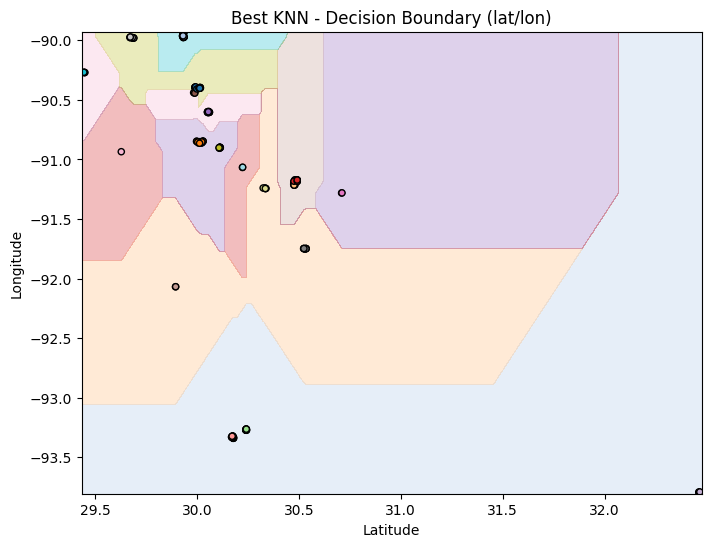

In [43]:
# 决策边界（仅适用于二维特征）
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    h = 0.001  # 网格精度
    x_min, x_max = X['lat'].min() - 0.01, X['lat'].max() + 0.01
    y_min, y_max = X['lon'].min() - 0.01, X['lon'].max() + 0.01
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled)
    Z = pd.factorize(Z)[0].reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="tab20")
    scatter = plt.scatter(X['lat'], X['lon'], c=pd.factorize(y)[0], edgecolor='k', cmap="tab20", s=20)
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

# 调用绘图
plot_decision_boundary(best_knn, X_test, y_test, title="Best KNN - Decision Boundary (lat/lon)")


In [44]:
#time series

In [45]:
from sklearn.metrics import log_loss

# 获取预测概率
y_proba_knn = best_knn.predict_proba(X_test_scaled)

# 计算 cross-entropy（log loss）
cross_entropy_knn = log_loss(y_test, y_proba_knn, labels=best_knn.classes_)
print(f"[Best KNN] Cross-Entropy (Log Loss) on Test Set: {cross_entropy_knn:.4f}")


[Best KNN] Cross-Entropy (Log Loss) on Test Set: 0.0000


/Users/lucyyang/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [46]:
import pandas as pd

# Ensure imaging_time is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract imaging_date (day only)
df['imaging_date'] = df['date'].dt.date

# Get all unique tank farms
tank_farms = df['tank farm'].unique()

# Dictionary to store the earliest imaging date for each tank farm
early_imaging_dates = {}
# Dictionary to store the count of images per tank farm
image_counts = {}

# Loop through each tank farm
for tank_farm in tank_farms:
    # Filter dataframe for the current tank farm
    df_farm = df[df['tank farm'] == tank_farm]

    # Find unique tank IDs in the current tank farm
    unique_tank_ids = set(df_farm['tank_id'].unique())

    # Initialize a set to track seen tank IDs
    seen_tank_ids = set()

    # Iterate over the dataframe sorted by imaging_date
    for date, group in df_farm.sort_values('imaging_date').groupby('imaging_date'):
        seen_tank_ids.update(group['tank_id'])
        if seen_tank_ids.issuperset(unique_tank_ids):  # Check if all tank IDs have been seen at least once
            early_imaging_dates[tank_farm] = date
            break

    # Count the number of distinct imaging records (rows) for the current tank farm
    image_counts[tank_farm] = df_farm['imaging_date'].nunique()

# Print results
for farm, date in early_imaging_dates.items():
    print(f"The earliest imaging date where all tank IDs have been seen at least once for tank farm {farm} is: {date}")

for farm, count in image_counts.items():
    print(f"Tank farm {farm} has {count} imaging updates.")

# Find the maximum date across all tank farms
max_date = max(early_imaging_dates.values())
print(f"The maximum date where all tank IDs have been seen at least once across all farms is: {max_date}")

The earliest imaging date where all tank IDs have been seen at least once for tank farm 9325 is: 2015-10-06
The earliest imaging date where all tank IDs have been seen at least once for tank farm 6685 is: 2014-01-21
The earliest imaging date where all tank IDs have been seen at least once for tank farm 8723 is: 2014-01-30
The earliest imaging date where all tank IDs have been seen at least once for tank farm 8816 is: 2014-05-26
The earliest imaging date where all tank IDs have been seen at least once for tank farm 9597 is: 2015-08-06
The earliest imaging date where all tank IDs have been seen at least once for tank farm 8426 is: 2015-08-01
The earliest imaging date where all tank IDs have been seen at least once for tank farm 8847 is: 2014-12-09
The earliest imaging date where all tank IDs have been seen at least once for tank farm 9123 is: 2014-07-30
The earliest imaging date where all tank IDs have been seen at least once for tank farm 9456 is: 2014-03-13
The earliest imaging date wh

/var/folders/mr/_l_j5nx127x8yq0jv5bf0j_c0000gn/T/ipykernel_11153/3867059857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/mr/_l_j5nx127x8yq0jv5bf0j_c0000gn/T/ipykernel_11153/3867059857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imaging_date'] = df['date'].dt.date


In [47]:
df = df[df['tank farm'] != '6678']  # Remove tank farm '6678'

In [48]:
# Ensure 'imaging_time' is in datetime format
df['date'] = pd.to_datetime(df['date'])
df['imaging_date'] = df['date'].dt.date  # Extract date from imaging time

# Define the start and end cutoff dates
start_date_cutoff = pd.to_datetime('2014-12-07').date()
end_date_cutoff = pd.to_datetime('2018-04-05').date()

# Create a complete list of all dates in the range
date_range = pd.date_range(start=start_date_cutoff, end=end_date_cutoff).date

# Get all unique tank farms and their associated tank types
tank_farms_info = df[['tank farm', 'farm_type']].drop_duplicates().set_index('tank farm')

# Initialize a dictionary to store last known values for each tank farm
last_known_values = {tank_farm: {} for tank_farm in tank_farms_info.index}

# Get the latest imaging data before start_date_cutoff for each tank farm
historical_data = df[df['imaging_date'] <= start_date_cutoff]
if not historical_data.empty:
    for tank_farm in tank_farms_info.index:
        df_tank_farm = historical_data[historical_data['tank farm'] == tank_farm]
        if not df_tank_farm.empty:
            most_recent = df_tank_farm.sort_values(by='date', ascending=False).groupby('tank_id').first()
            last_known_values[tank_farm] = most_recent[['tank volume', 'fill_pct', 'max_vol']].to_dict('index')

# Initialize an empty DataFrame to track tank farm volumes
df_tank_farm_volumes = pd.DataFrame(columns=['Date', 'tank_farm_id', 'tank_type', 'max_vol', 'tank_volume', 'average_fill_pct'])

# Loop through all dates in the range
for date in date_range:
    df_date = df[df['imaging_date'] == date]
    df_today = []

    for tank_farm in tank_farms_info.index:
        tank_type = tank_farms_info.loc[tank_farm, 'farm_type']
        df_tank_farm = df_date[df_date['tank farm'] == tank_farm]

        # Update last known values if new imaging data exists
        if not df_tank_farm.empty:
            most_recent_volumes = df_tank_farm.sort_values(by='date', ascending=False).groupby('tank_id').first()
            last_known_values[tank_farm].update(most_recent_volumes[['tank volume', 'fill_pct', 'max_vol']].to_dict('index'))

        # Compute total volume and average fill percentage
        if last_known_values[tank_farm]:
            total_volume = sum(v['tank volume'] for v in last_known_values[tank_farm].values())
            max_vol = sum(v['max_vol'] for v in last_known_values[tank_farm].values())
            avg_fill_pct = sum(v['fill_pct'] for v in last_known_values[tank_farm].values()) / len(last_known_values[tank_farm])
        else:
            total_volume, avg_fill_pct, max_vol = 0, 0, 0

        df_today.append({'Date': date, 'tank_farm_id': tank_farm, 'tank_type': tank_type, 'max_vol': max_vol,
                         'tank_volume': total_volume, 'average_fill_pct': avg_fill_pct})

    df_tank_farm_volumes = pd.concat([df_tank_farm_volumes, pd.DataFrame(df_today)])

# Reset index
df_tank_farm_volumes.reset_index(drop=True, inplace=True)
df_tank_farm_volumes

Date tank_farm_id tank_type       max_vol   tank_volume  \
0      2014-12-07         9325  REFINERY  5.989479e+06  3.039491e+06   
1      2014-12-07         6685  TERMINAL  5.748817e+05  3.403100e+05   
2      2014-12-07         8723  REFINERY  2.120466e+06  1.193304e+06   
3      2014-12-07         8816  REFINERY  1.304807e+07  7.542355e+06   
4      2014-12-07         9597  REFINERY  3.225595e+06  1.391831e+06   
...           ...          ...       ...           ...           ...   
32827  2018-04-05         6676  TERMINAL  1.079491e+05  5.142939e+04   
32828  2018-04-05         6647  TERMINAL  8.412184e+05  4.517908e+05   
32829  2018-04-05         6697  TERMINAL  9.229001e+04  6.744001e+04   
32830  2018-04-05         6675  TERMINAL  1.523799e+05  8.102818e+04   
32831  2018-04-05         6678  TERMINAL  1.150666e+05  9.928985e+04   

       average_fill_pct  
0              0.518018  
1              0.537705  
2              0.498025  
3              0.588693  
4              0.450470  
...                 ...  
32827          0.477684  
32828          0.534846  
32829          0.698567  
32830          0.524120  
32831          0.862890  

[32832 rows x 6 columns]

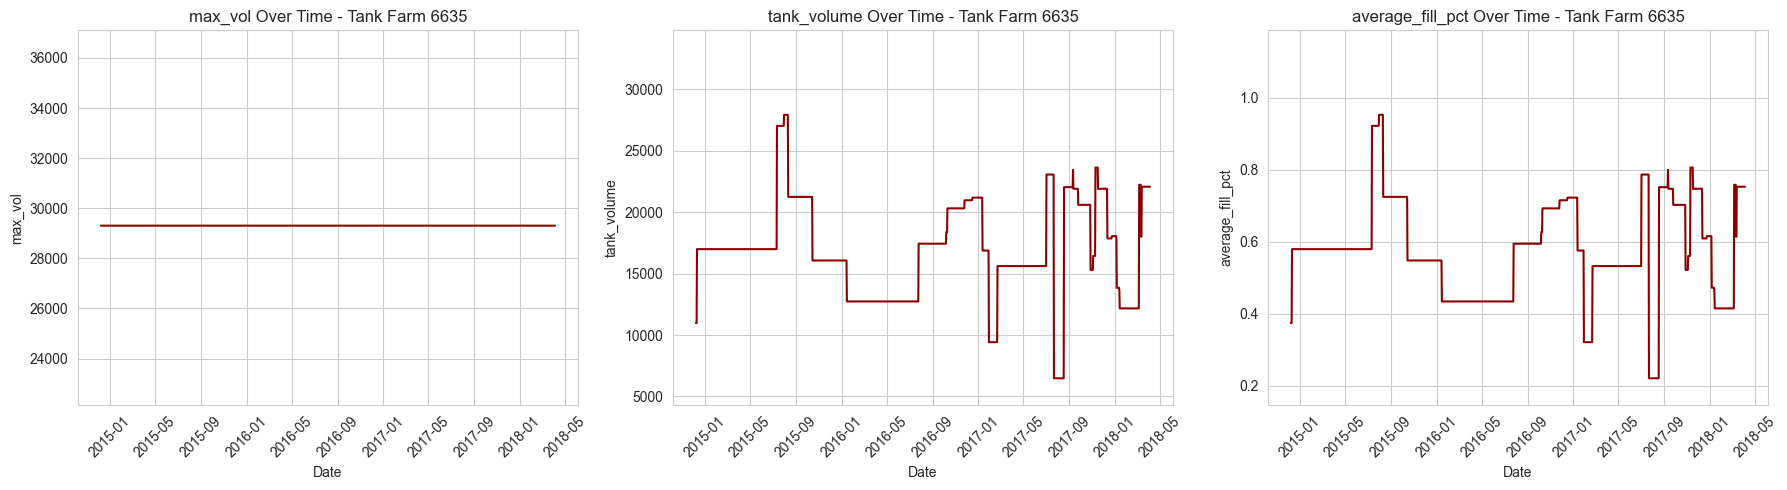

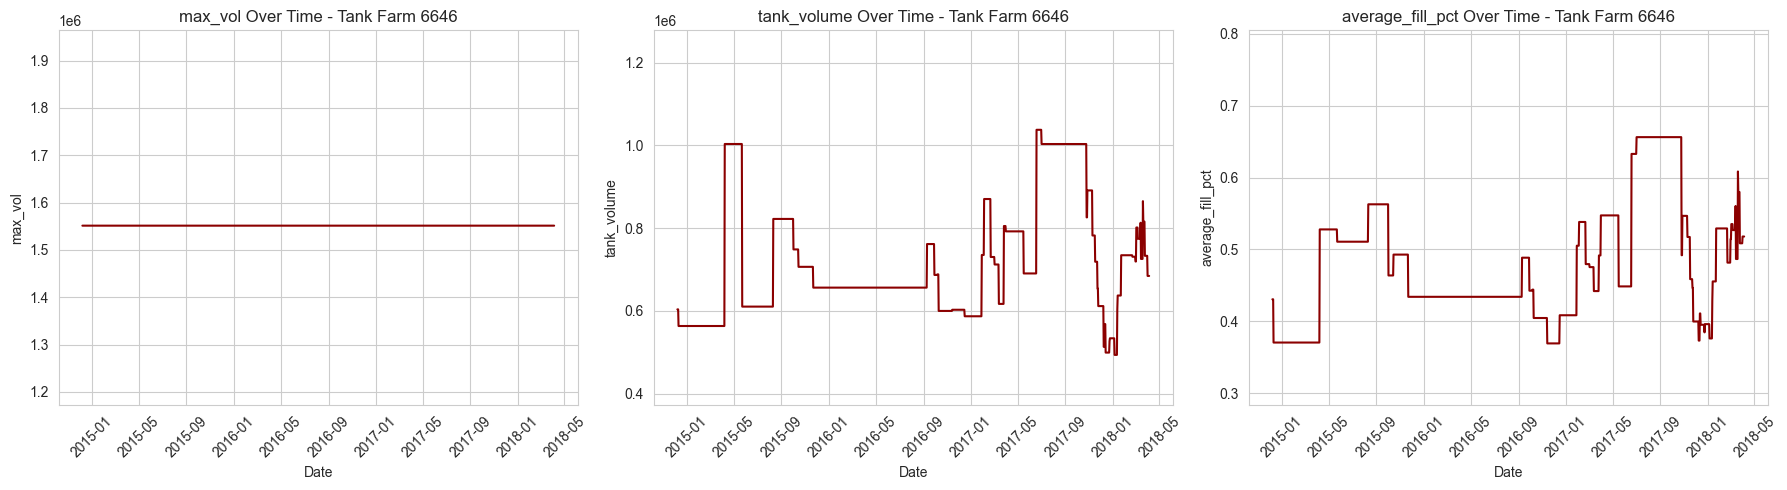

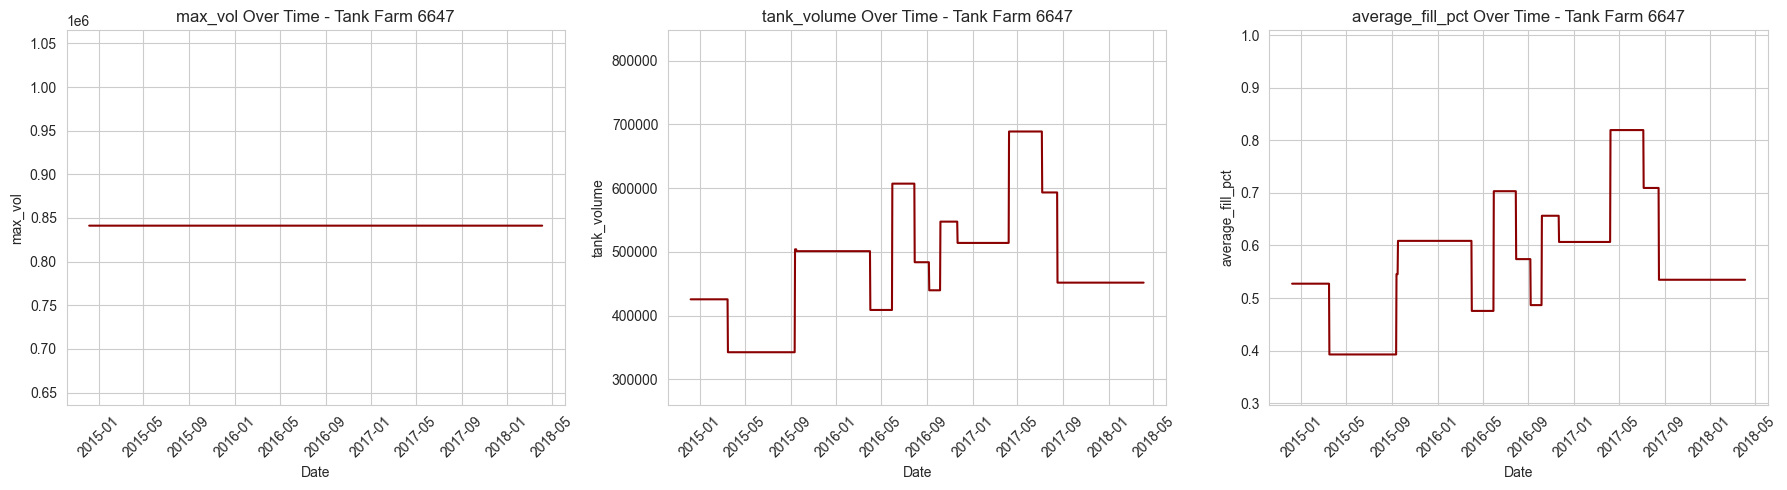

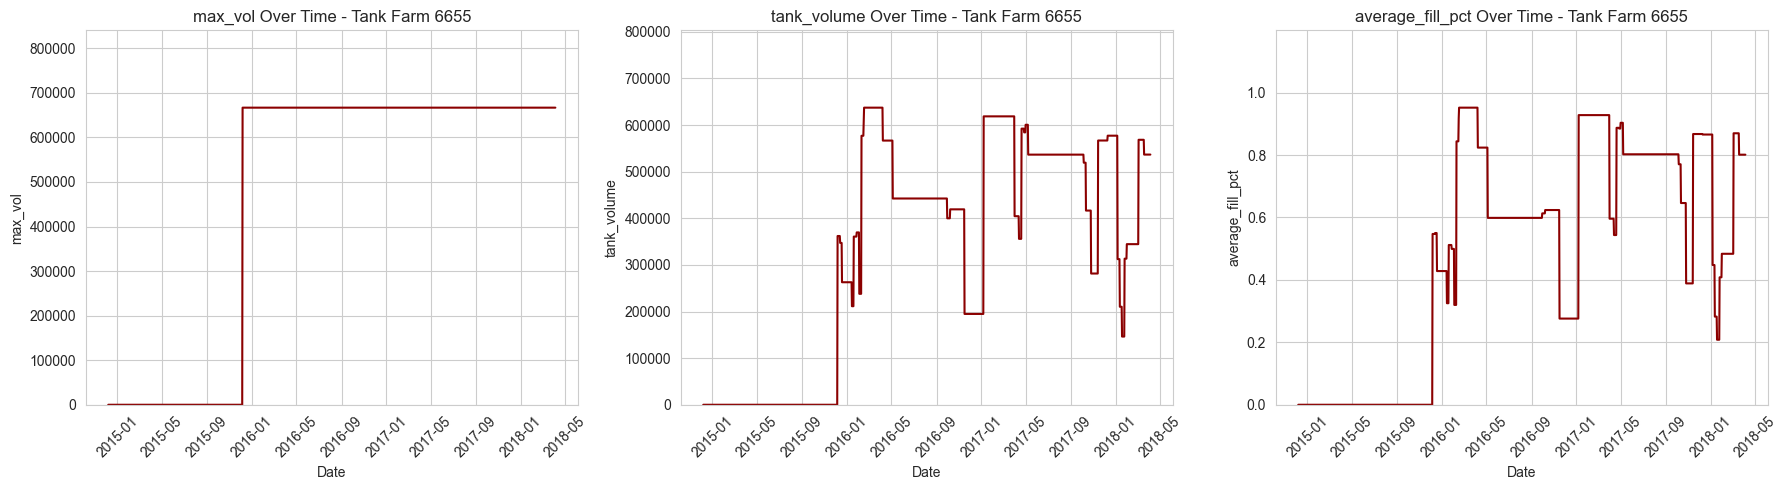

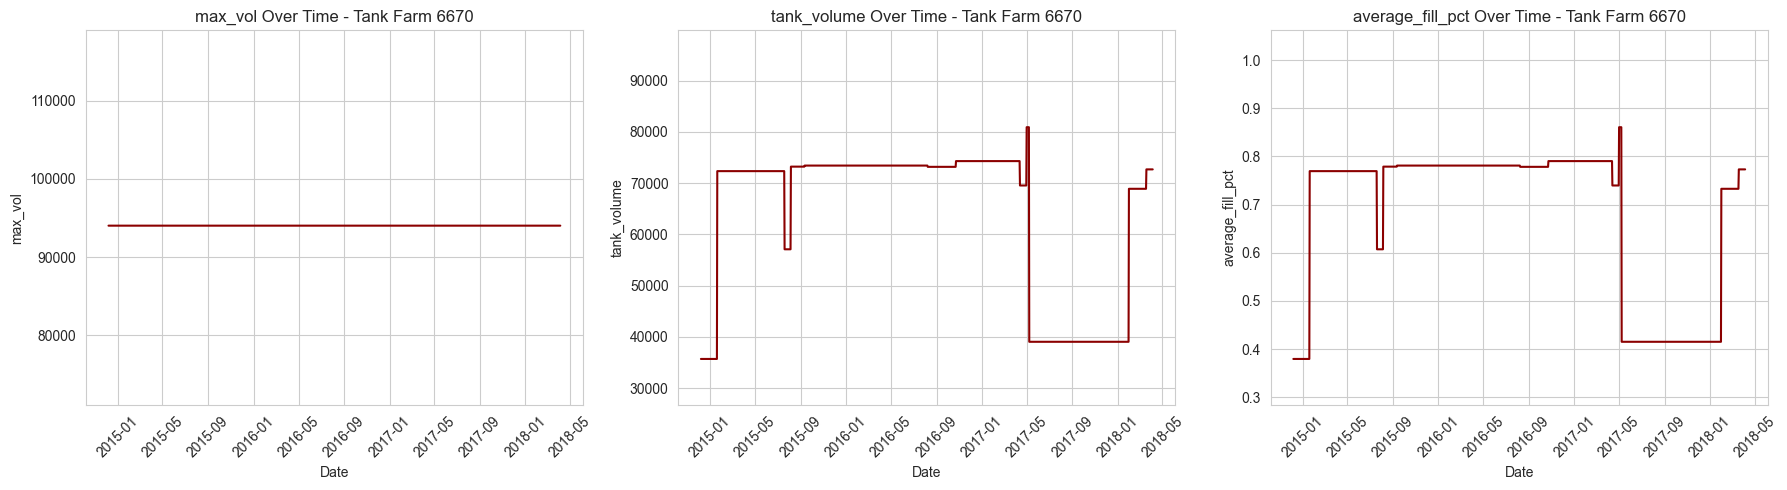

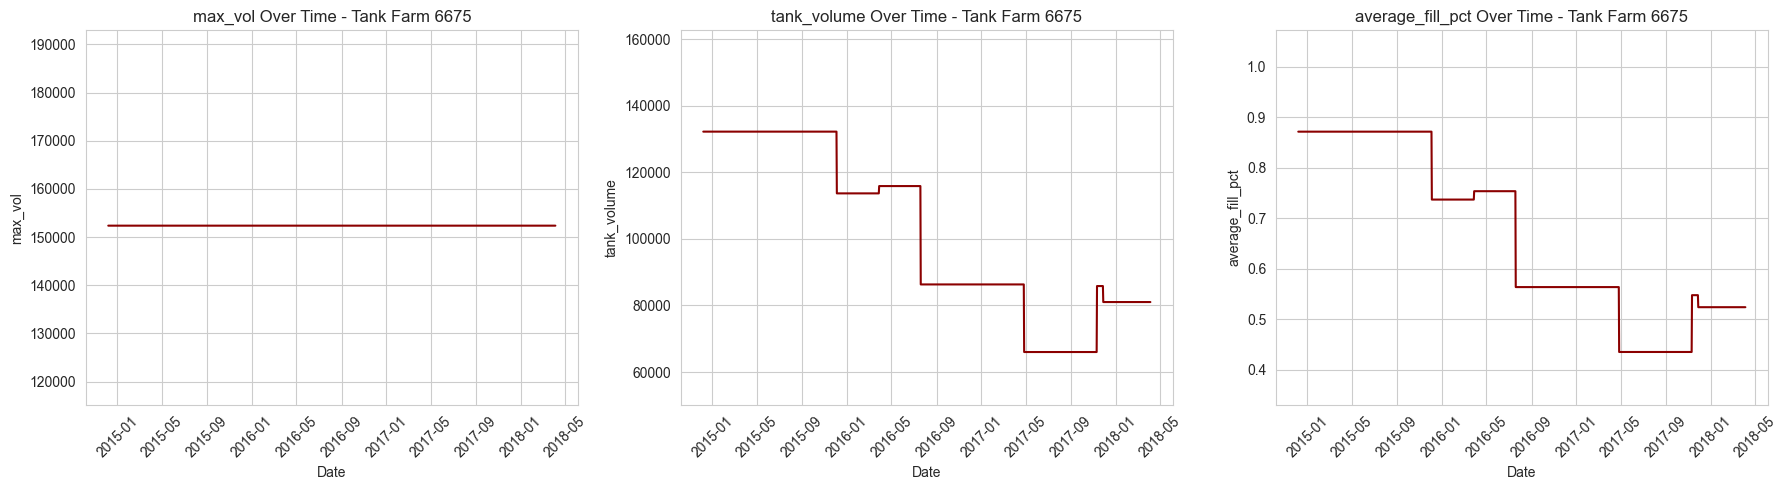

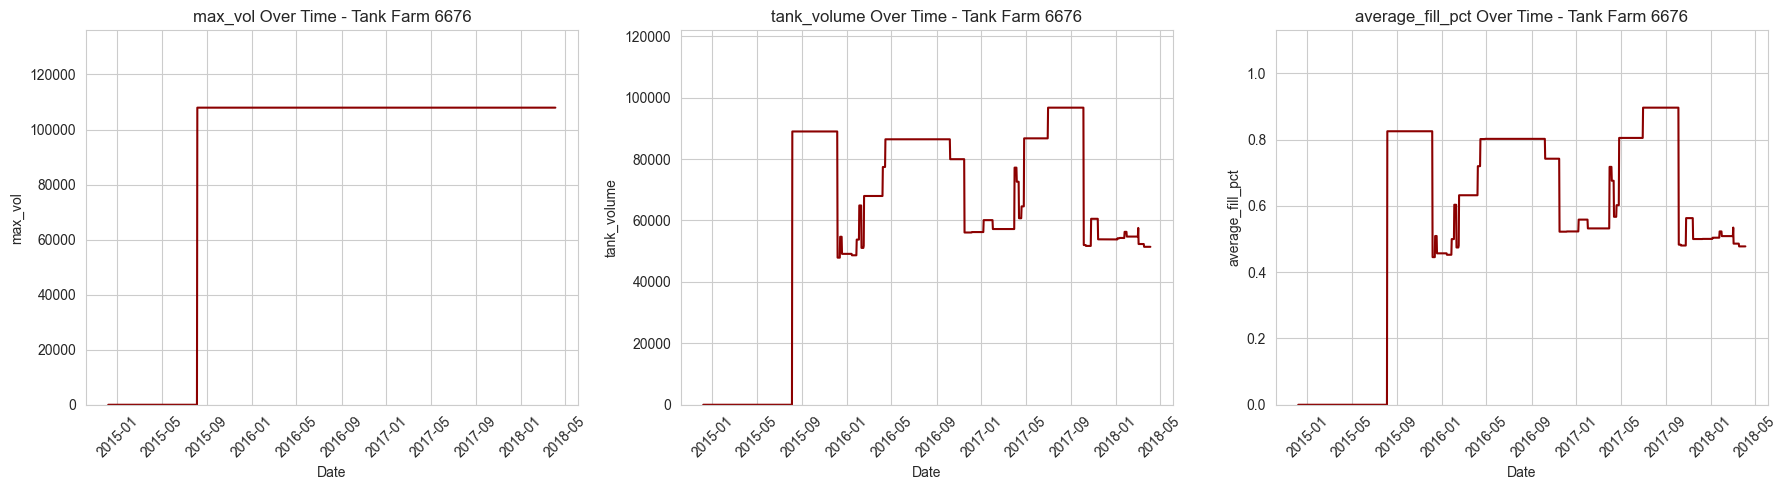

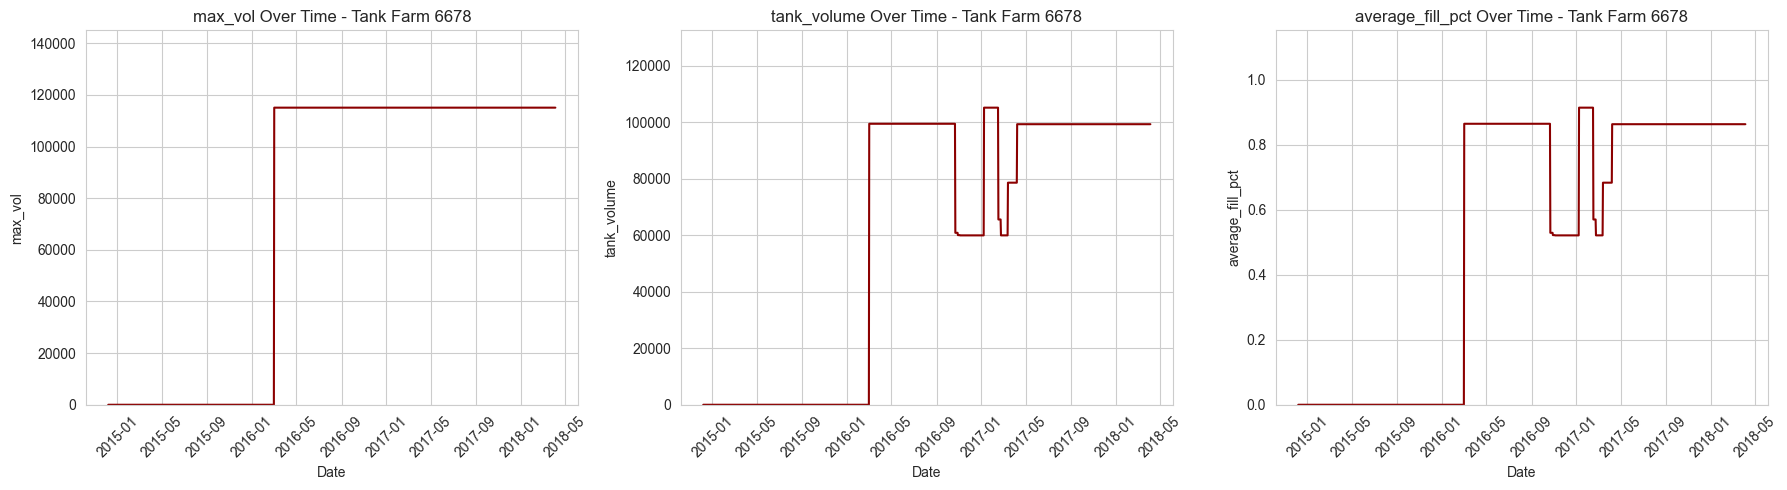

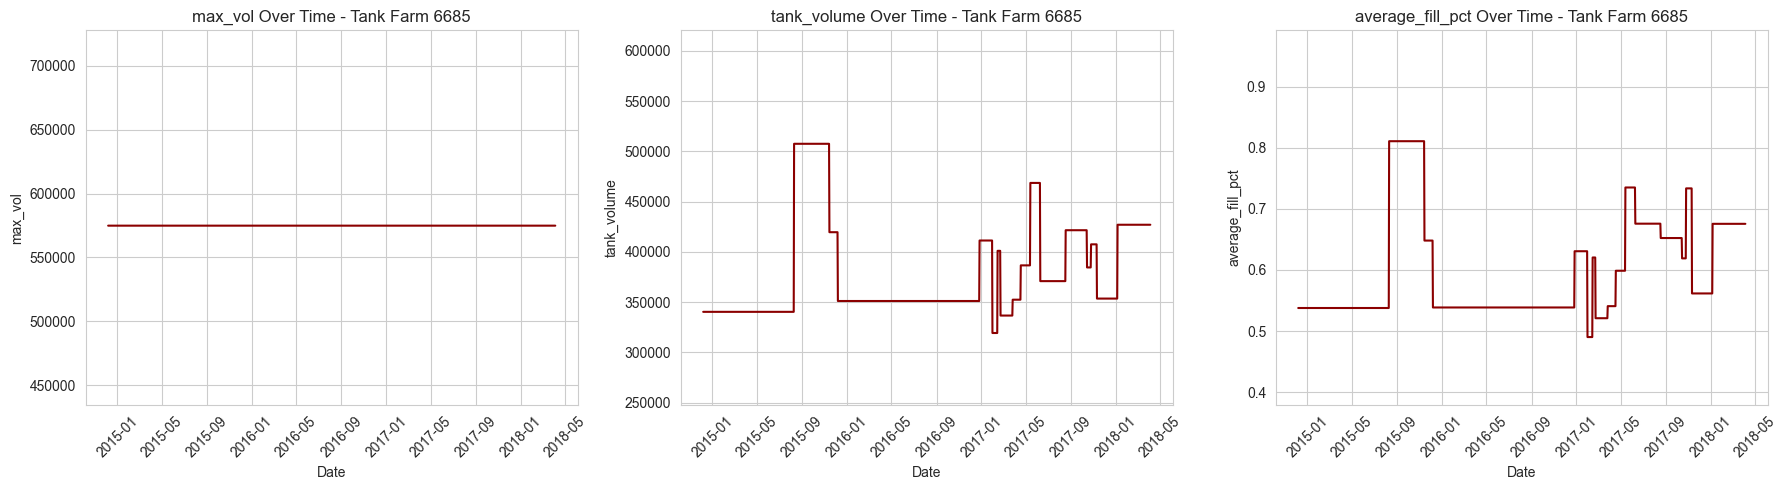

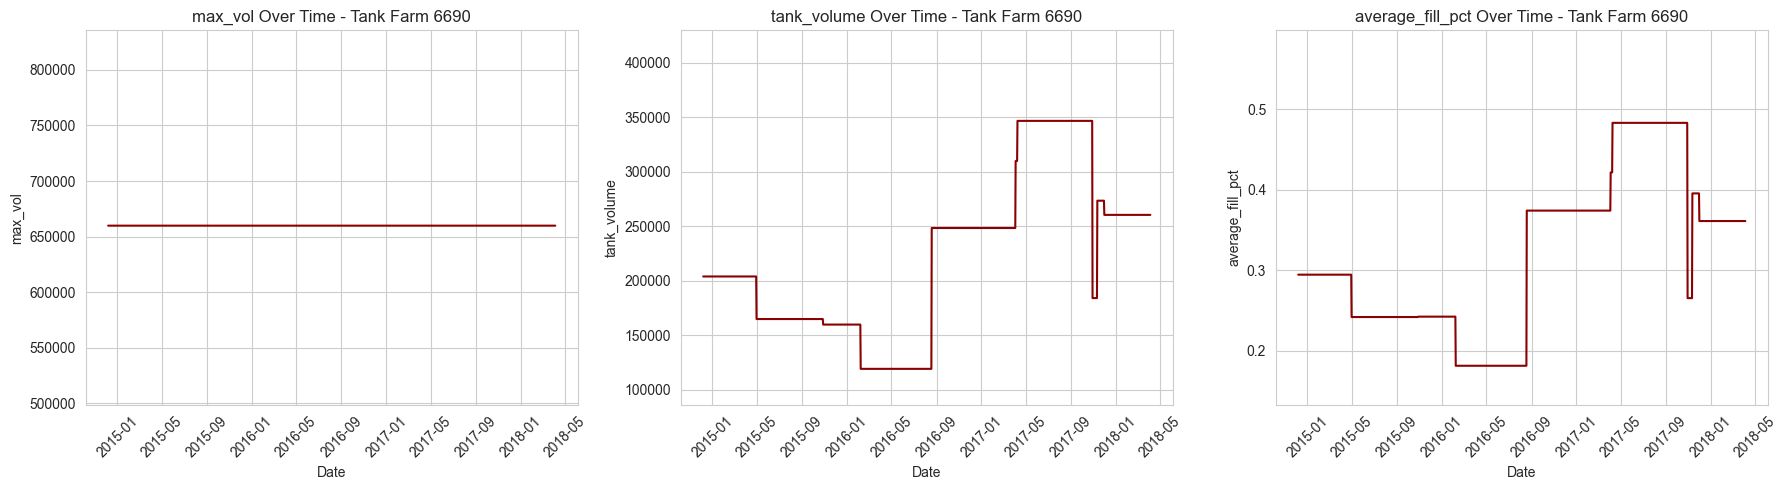

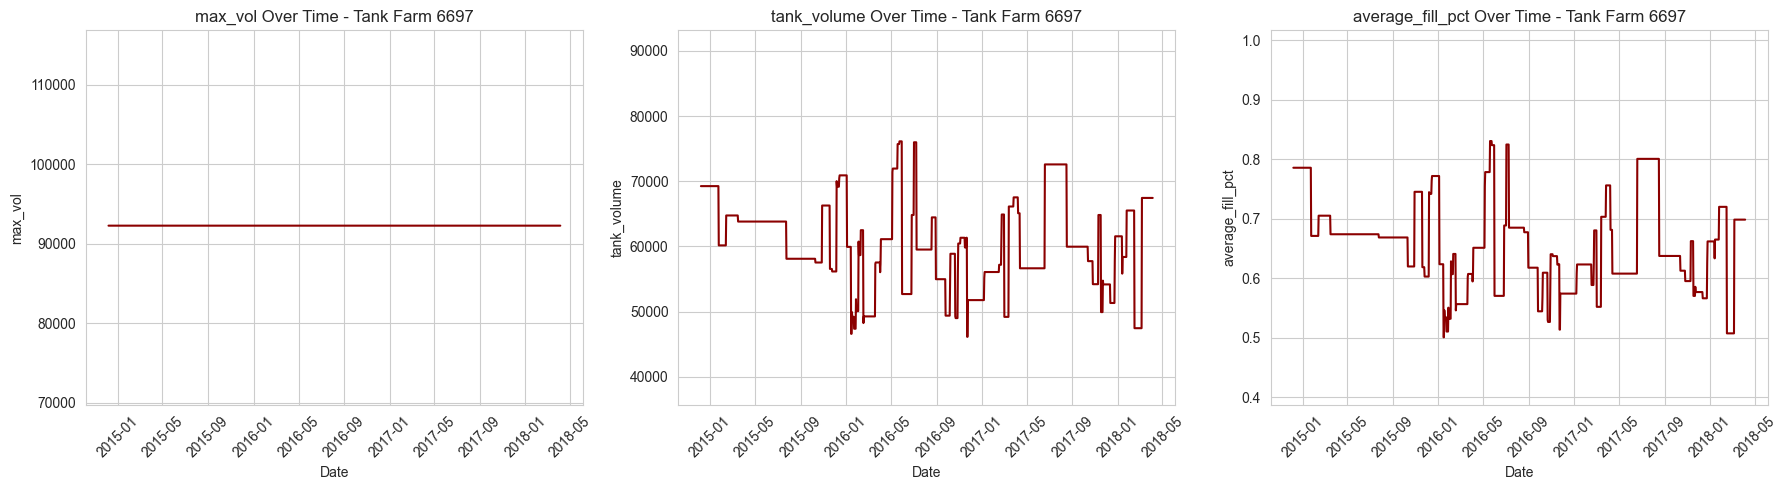

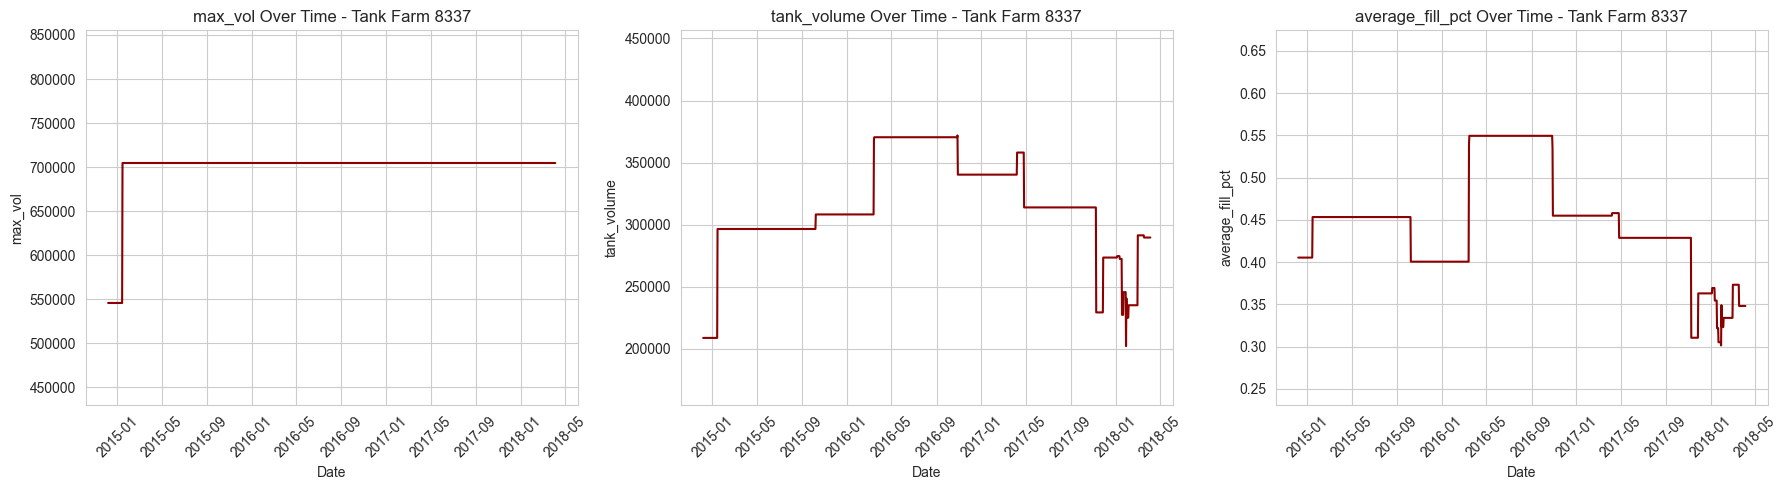

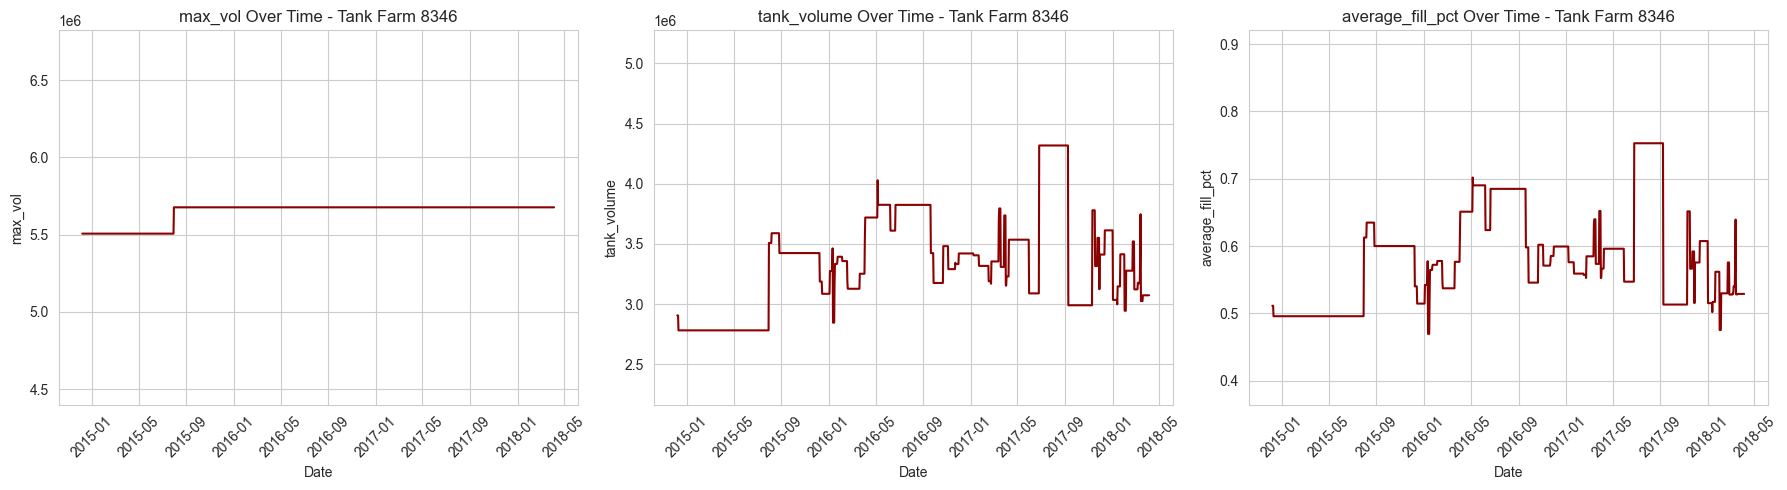

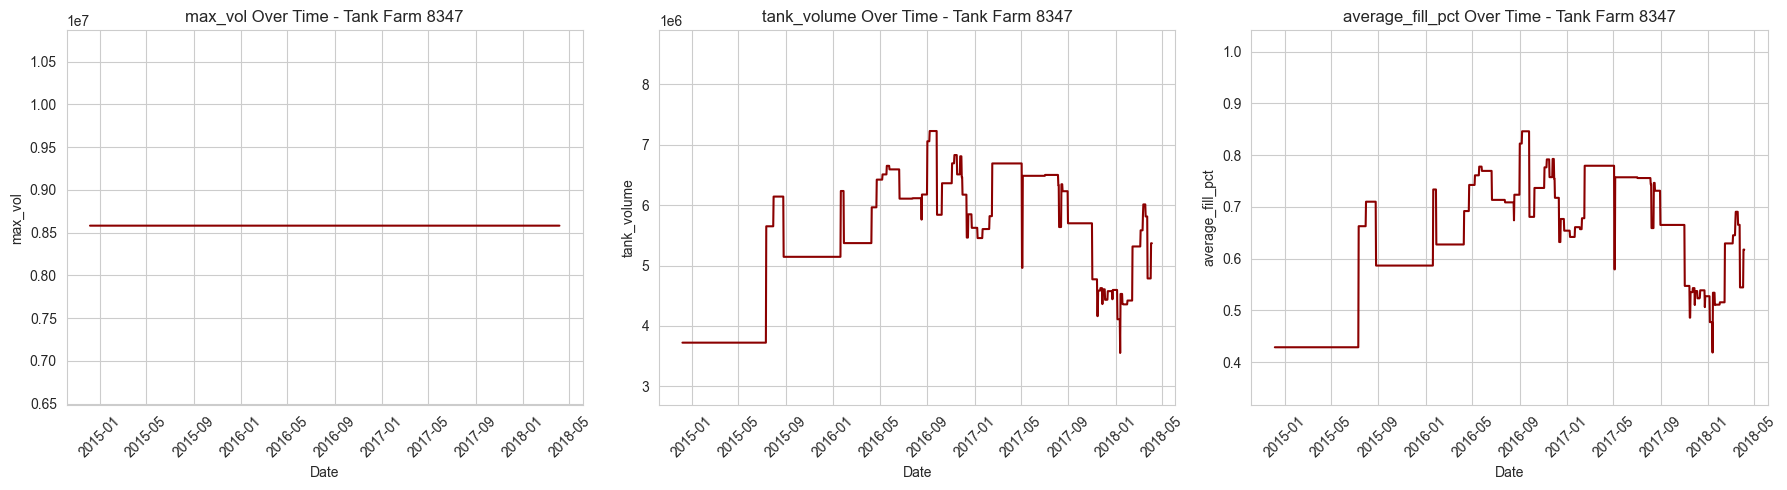

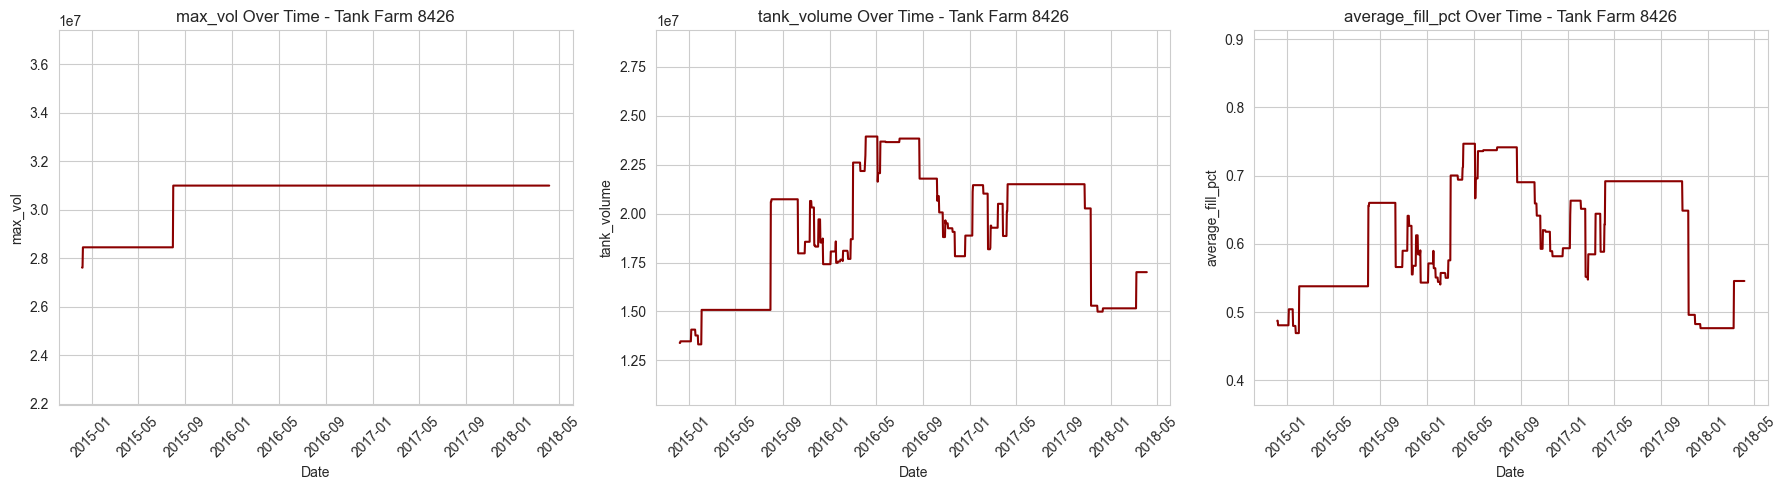

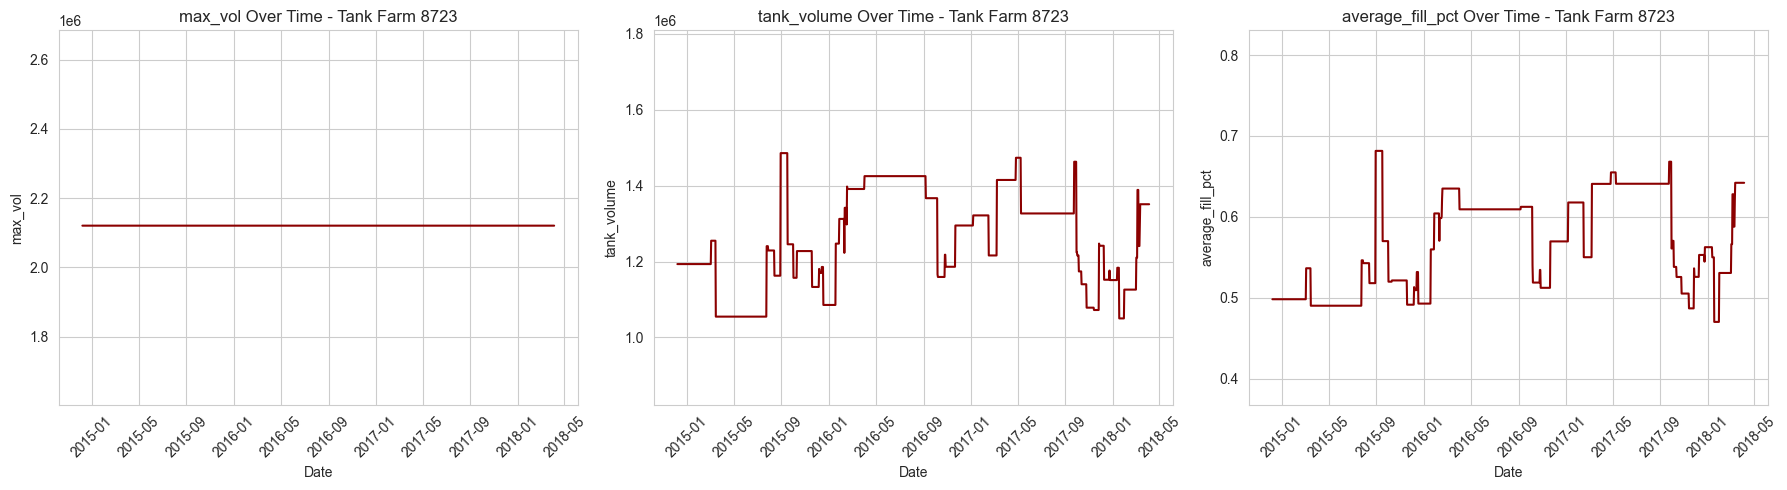

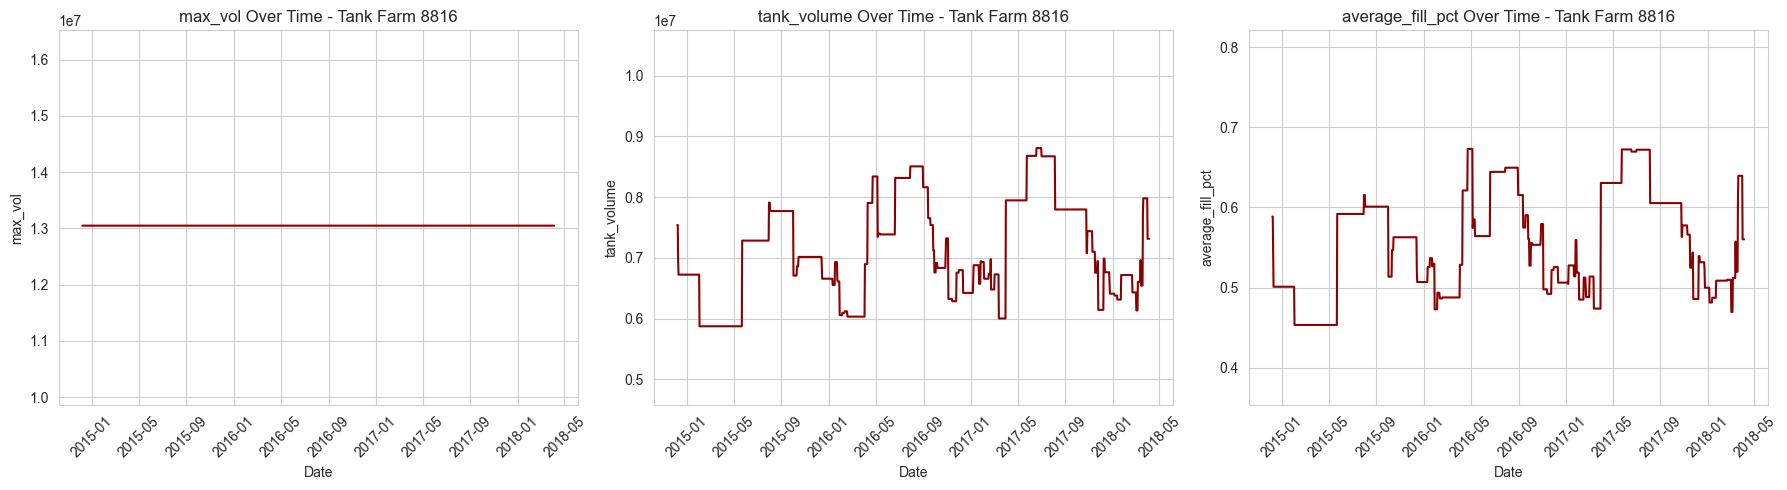

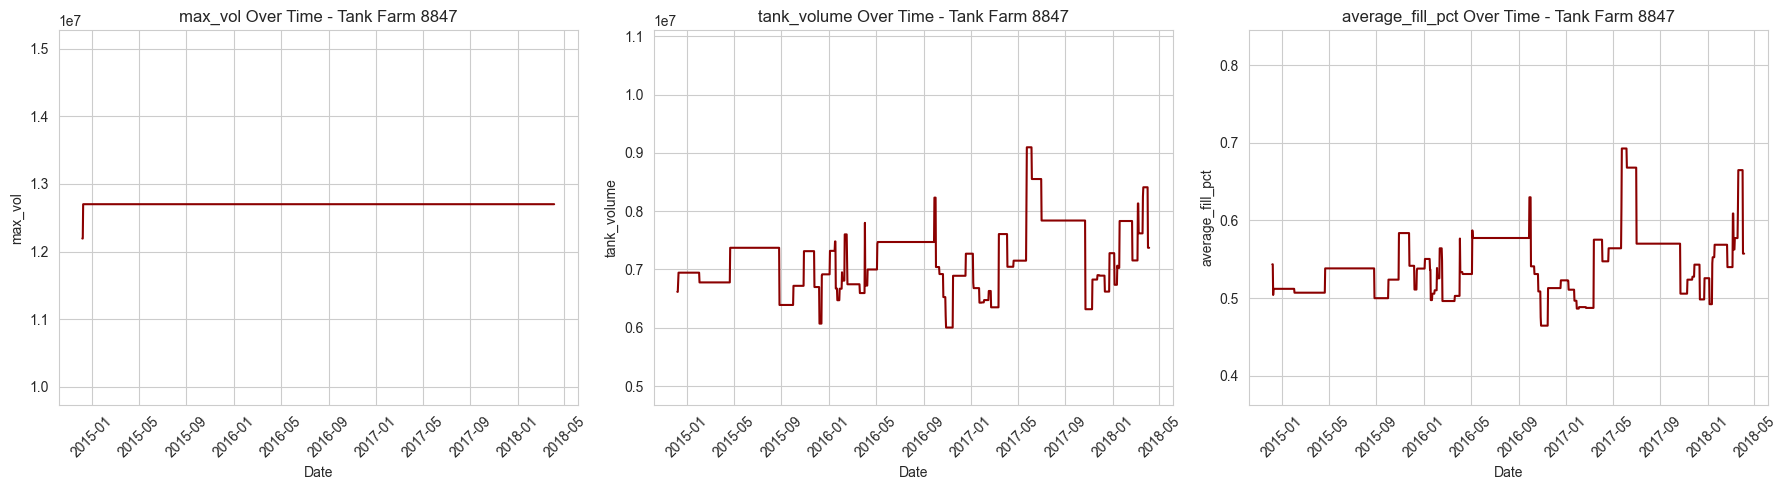

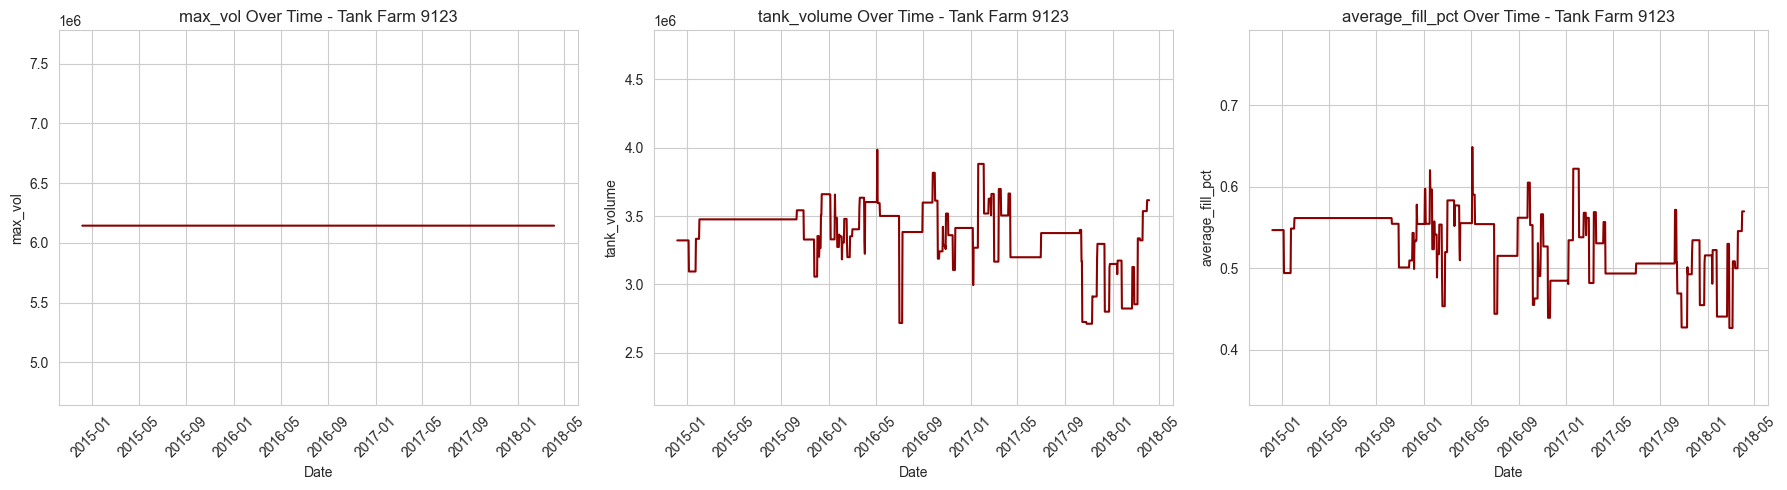

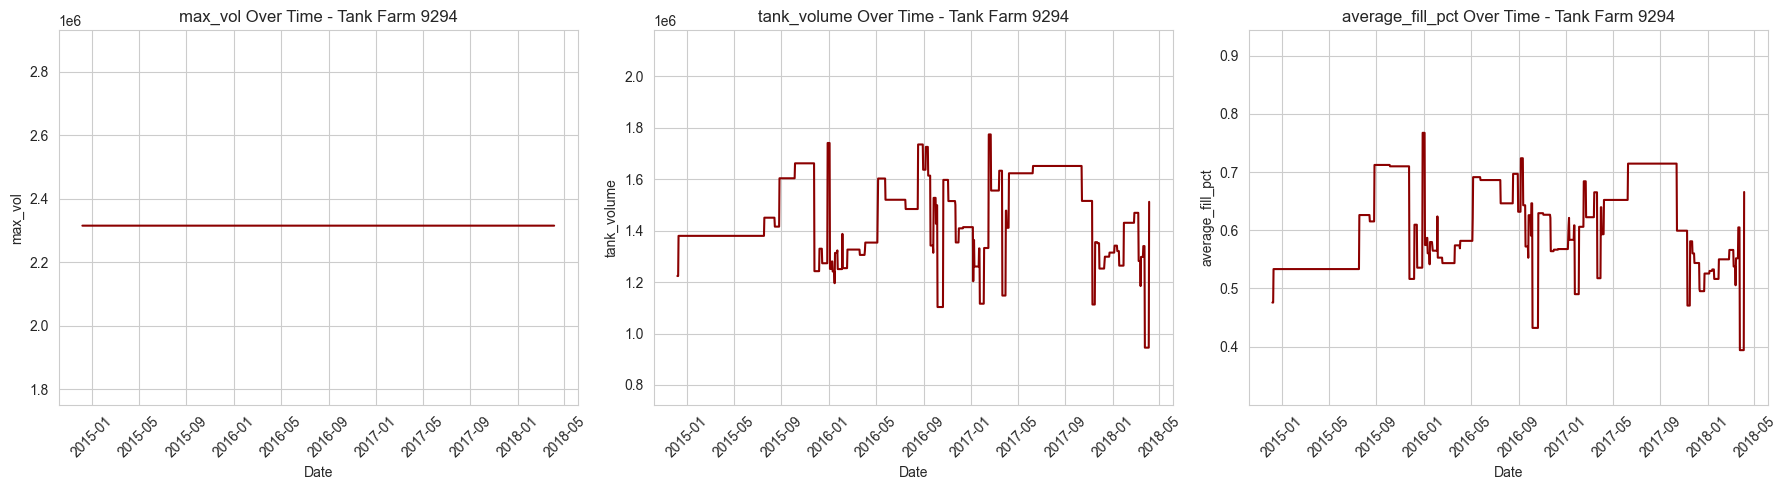

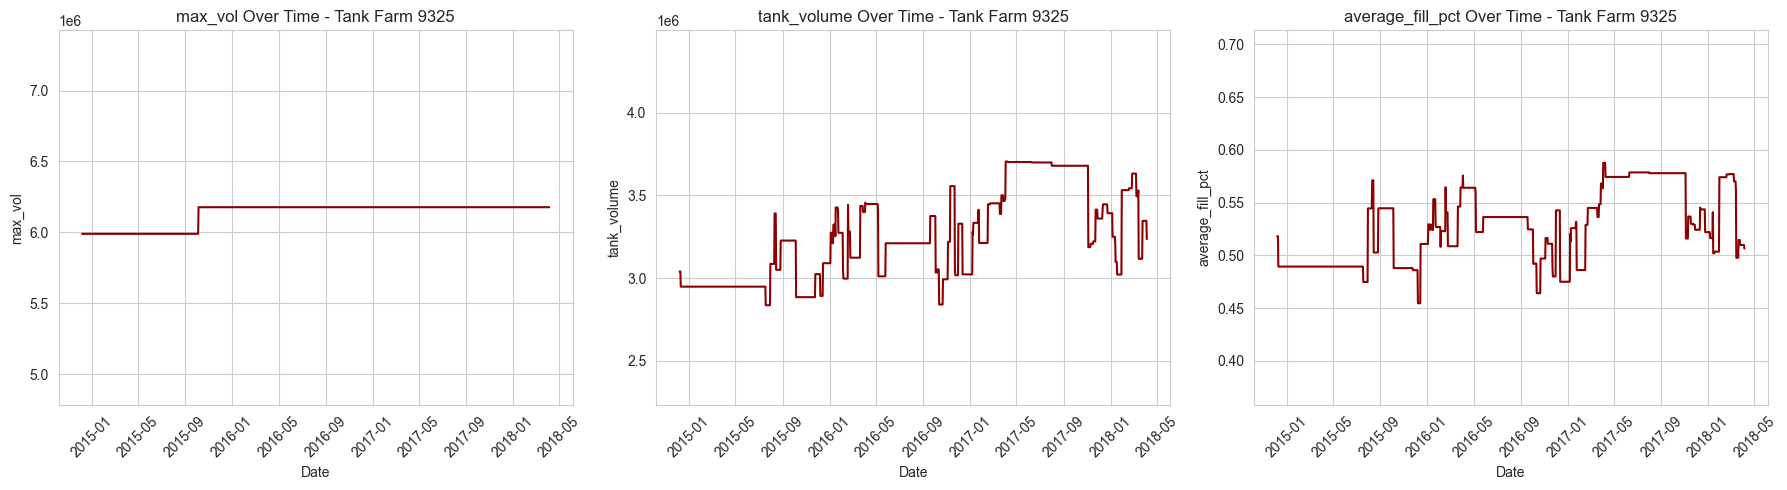

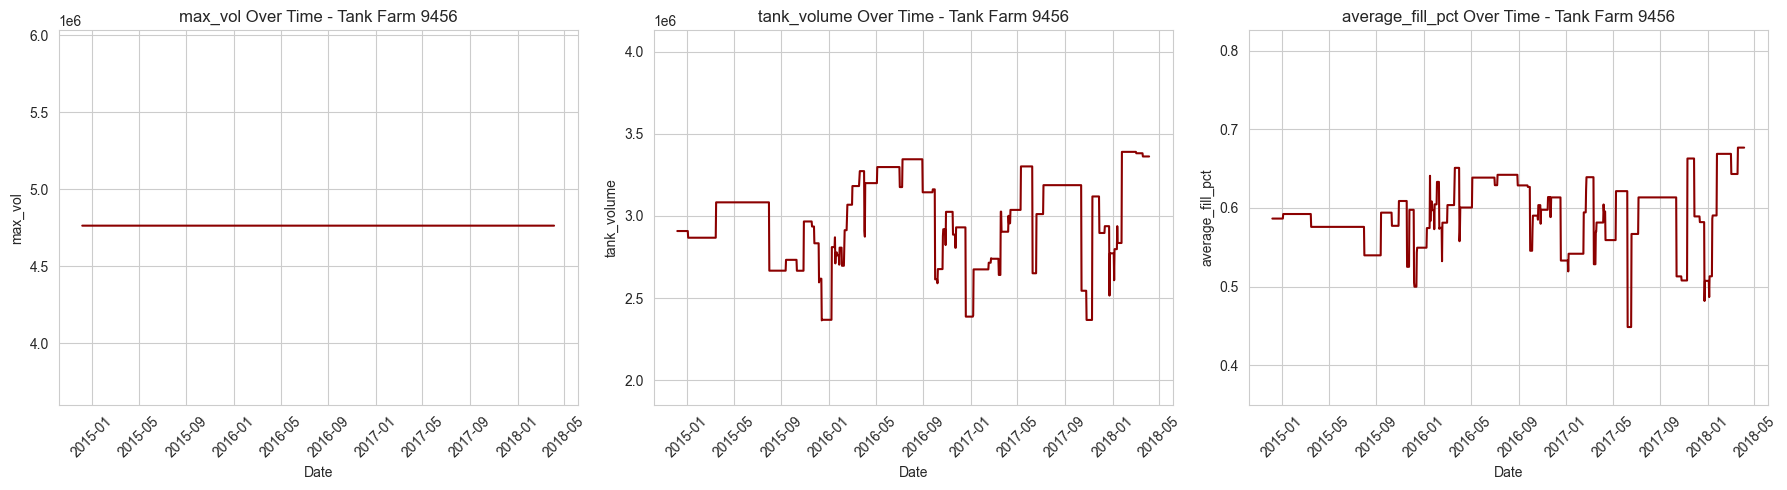

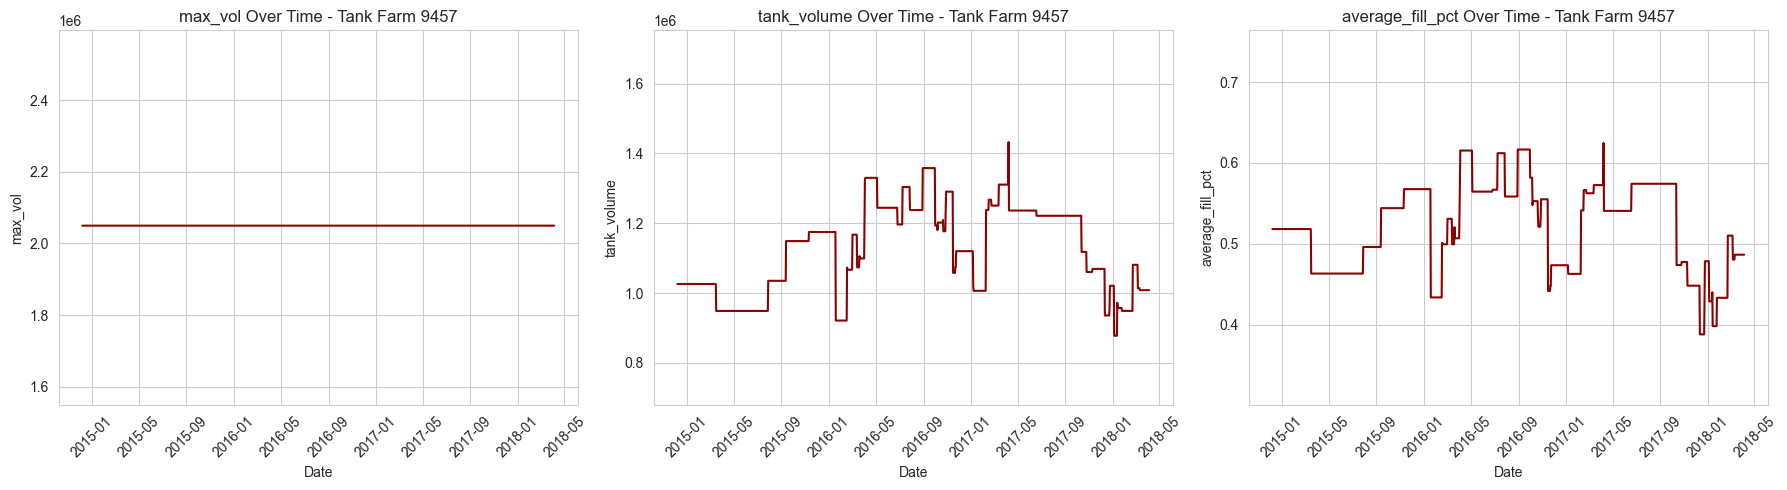

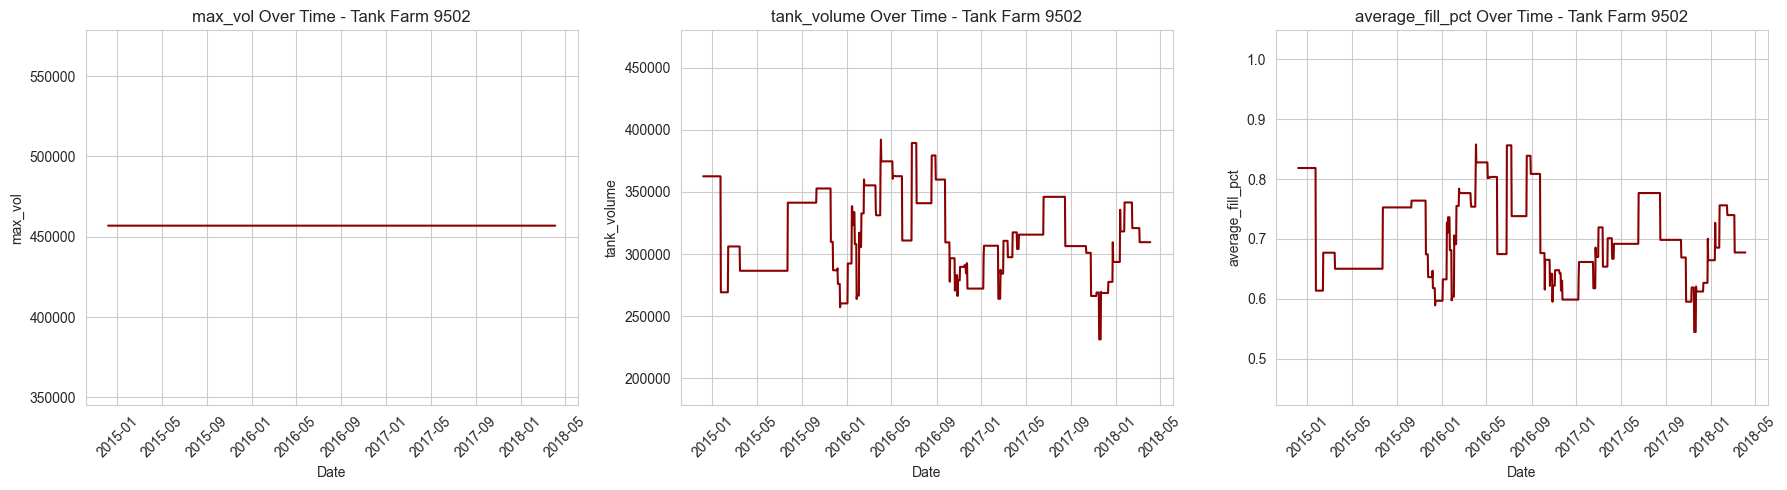

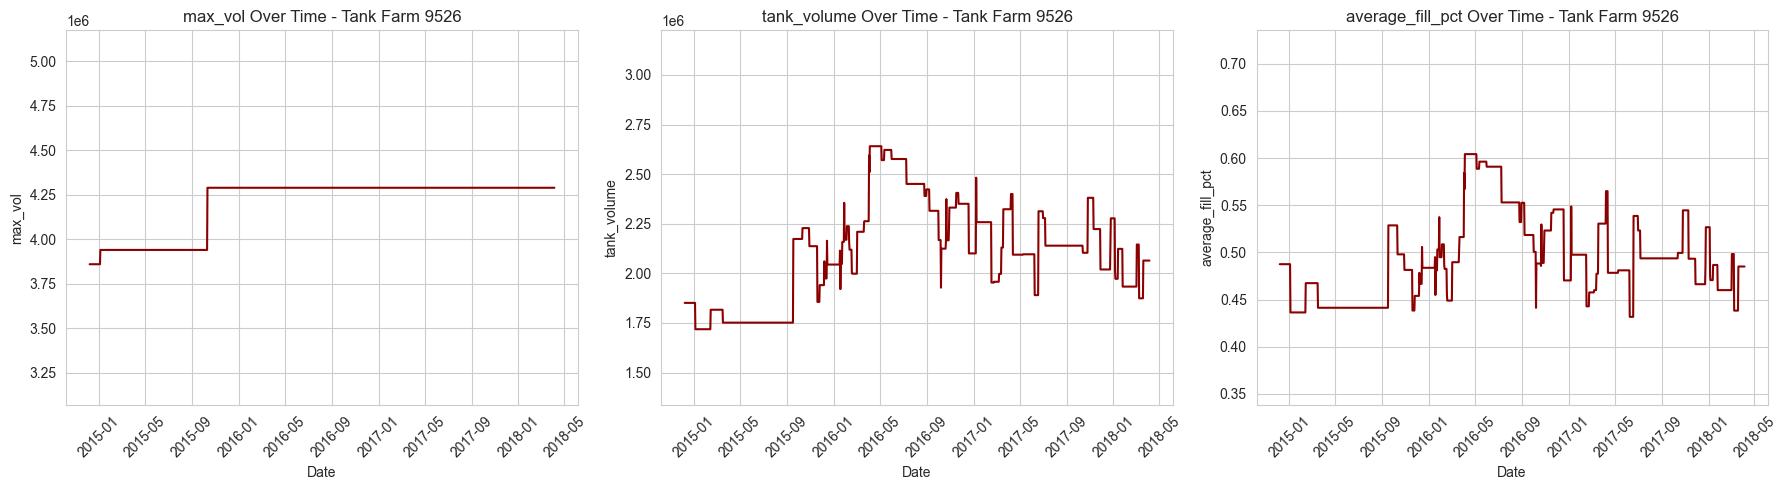

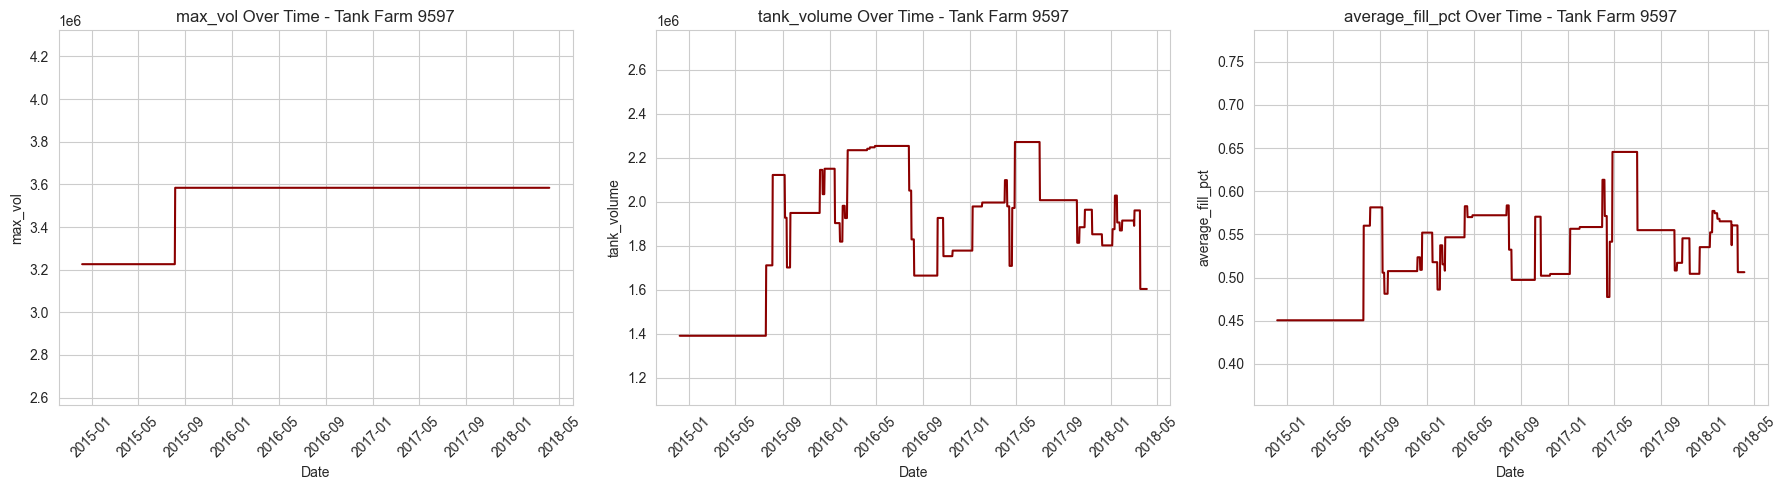

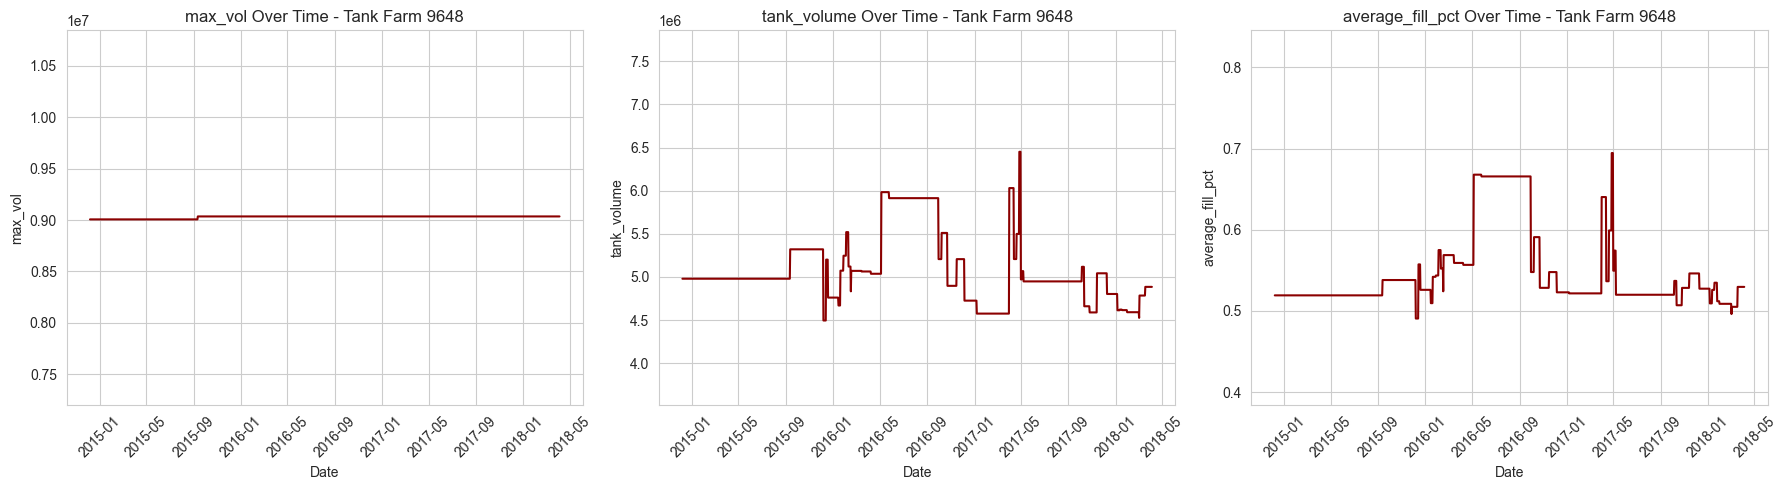

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
sns.set_palette("icefire")

# Define the variables to plot
variables = ['max_vol', 'tank_volume', 'average_fill_pct']
padding_factor = 0.2
start_date = pd.to_datetime('2014-12-07').date()  # Convert start_date to a datetime.date object

for farm_id, group in df_tank_farm_volumes.groupby('tank_farm_id'):

    # Create three subplots (one for each variable)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharex=True)

    for i, var in enumerate(variables):
        # Plot the line for each variable
        sns.lineplot(ax=axes[i], data=group, x='Date', y=var, color='darkred')
        axes[i].set_ylabel(var)
        axes[i].set_title(f"{var} Over Time - Tank Farm {farm_id}")
        axes[i].tick_params(axis='x', rotation=45, labelbottom=True)

        # Adjust y-axis limits with padding
        y_min, y_max = axes[i].get_ylim()
        y_min = y_min - y_min * padding_factor
        y_max = y_max + y_max * padding_factor
        axes[i].set_ylim(y_min if y_min > 0 else 0, y_max)

    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()

In [50]:
df_tank_farm_volumes.to_excel("df_tank_farm_volumes.xlsx")

In [53]:
df_tank_farm_volumes['Date'] = pd.to_datetime(df_tank_farm_volumes['Date'])  # Ensure datetime format
df_weekly = (
    df_tank_farm_volumes.set_index('Date')
    .groupby('tank_farm_id')
    .resample('W')
    .agg({
        'tank_volume': 'mean',
        'max_vol': 'max',
        'average_fill_pct': 'mean',
        'tank_type': 'first'  # Just to retain categorical info
    })
    .reset_index()
)

In [54]:
df_weekly

tank_farm_id       Date   tank_volume       max_vol  average_fill_pct  \
0             6635 2014-12-07  1.098137e+04  2.930376e+04          0.374743   
1             6635 2014-12-14  1.527223e+04  2.930376e+04          0.521170   
2             6635 2014-12-21  1.698858e+04  2.930376e+04          0.579741   
3             6635 2014-12-28  1.698858e+04  2.930376e+04          0.579741   
4             6635 2015-01-04  1.698858e+04  2.930376e+04          0.579741   
...            ...        ...           ...           ...               ...   
4720          9648 2018-03-11  4.784159e+06  9.035238e+06          0.505016   
4721          9648 2018-03-18  4.784159e+06  9.035238e+06          0.505016   
4722          9648 2018-03-25  4.884836e+06  9.035238e+06          0.529585   
4723          9648 2018-04-01  4.884836e+06  9.035238e+06          0.529585   
4724          9648 2018-04-08  4.884836e+06  9.035238e+06          0.529585   

     tank_type  
0     TERMINAL  
1     TERMINAL  
2     TERMINAL  
3     TERMINAL  
4     TERMINAL  
...        ...  
4720  REFINERY  
4721  REFINERY  
4722  REFINERY  
4723  REFINERY  
4724  REFINERY  

[4725 rows x 6 columns]

In [ ]:
# Count occurrences of each tank_farm_id in the original df
farm_counts = df['tank farm'].value_counts().reset_index()
farm_counts.columns = ['tank_farm_id', 'count']
farm_counts

In [ ]:
df

In [65]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def run_arima_forecast(df, tank_id, window_size=4, step_size=1, plot=True):
    data = df[df['tank_farm_id'] == tank_id].copy()
    data = data.sort_values('Date').set_index('Date')
    series = data['average_fill_pct']

    n = len(series)
    # if n < 10:  # Avoid issues caused by too few data points
    #     print(f"tank_farm_id = {tank_id} has insufficient data, skipping")
    #     return None

    train_size = int(n * 0.7)
    train_data_initial = series.iloc[:train_size]
    test_data = series.iloc[train_size:]

    all_predictions = []
    all_actuals = []
    forecast_dates = []

    for i in range(0, len(test_data) - step_size + 1, step_size):
        current_train = pd.concat([train_data_initial, test_data.iloc[:i]])

        try:
            model = auto_arima(
                current_train, 
                start_p=0, max_p=5,
                start_q=0, max_q=5,
                start_d=0, max_d=3,
                seasonal=False,
                trace=False,
                error_action='ignore',
                suppress_warnings=True,
                information_criterion='aic'
            )
            prediction = model.predict(n_periods=1)[0]
        except:
            prediction = current_train.iloc[-1]

        actual = test_data.iloc[i]
        forecast_date = test_data.index[i]

        all_predictions.append(prediction)
        all_actuals.append(actual)
        forecast_dates.append(forecast_date)

    mse = mean_squared_error(all_actuals, all_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(all_actuals, all_predictions)

    print(f"[tank_farm_id = {tank_id}] MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    if plot:
        plt.figure(figsize=(12, 4))
        plt.plot(series.index, series.values, label='All Data')
        plt.plot(forecast_dates, all_predictions, label='Predictions', linestyle='--')
        plt.axvline(x=series.index[train_size], color='gray', linestyle=':', label='Train/Test Split')
        plt.title(f"ARIMA Forecast - tank_farm_id: {tank_id}")
        plt.xlabel("Date")
        plt.ylabel("average_fill_pct")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return {
        'tank_farm_id': tank_id,
        'mse': mse,
        'rmse': rmse,
        'mae': mae
    }

# Automatically filter tank_farm_id with more than 1000 records
qualified_tanks = df['tank farm'].value_counts()
qualified_tank_ids = qualified_tanks[qualified_tanks > 1000].index.tolist()

print(f"There are {len(qualified_tank_ids)} tank_farm_id(s) with more than 1000 records:", qualified_tank_ids)

There are 13 tank_farm_id(s) with more than 1000 records: [8816, 8426, 9526, 9325, 9123, 8847, 9648, 8346, 9456, 8723, 9597, 9294, 9457]


[tank_farm_id = 8816] MSE: 0.0006, RMSE: 0.0248, MAE: 0.0141


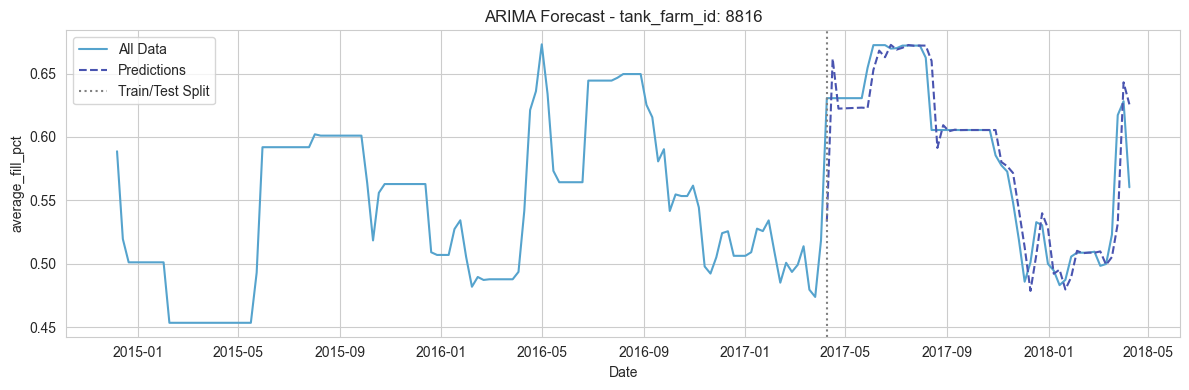

[tank_farm_id = 8426] MSE: 0.0004, RMSE: 0.0202, MAE: 0.0092


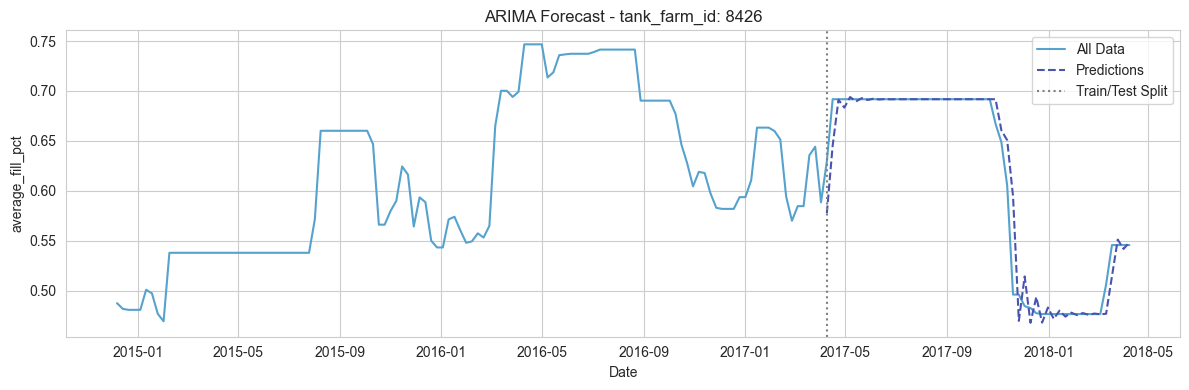

[tank_farm_id = 9526] MSE: 0.0005, RMSE: 0.0229, MAE: 0.0125


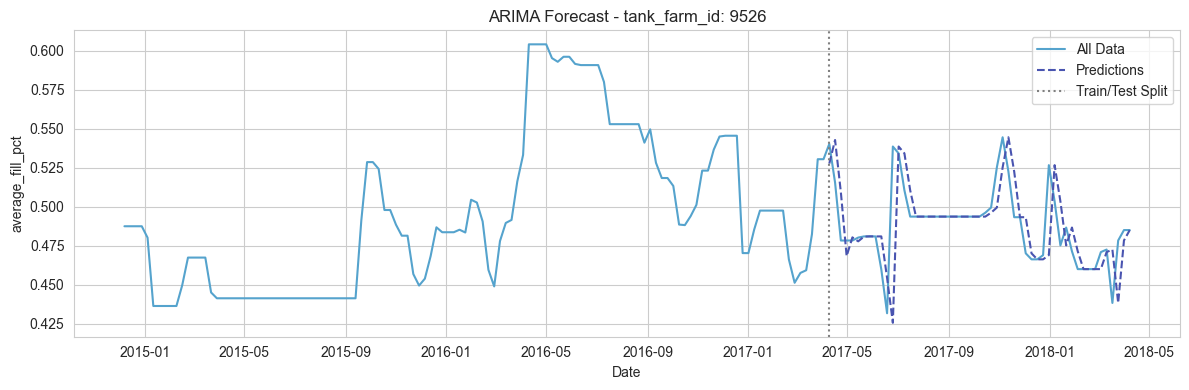

[tank_farm_id = 9325] MSE: 0.0002, RMSE: 0.0134, MAE: 0.0065


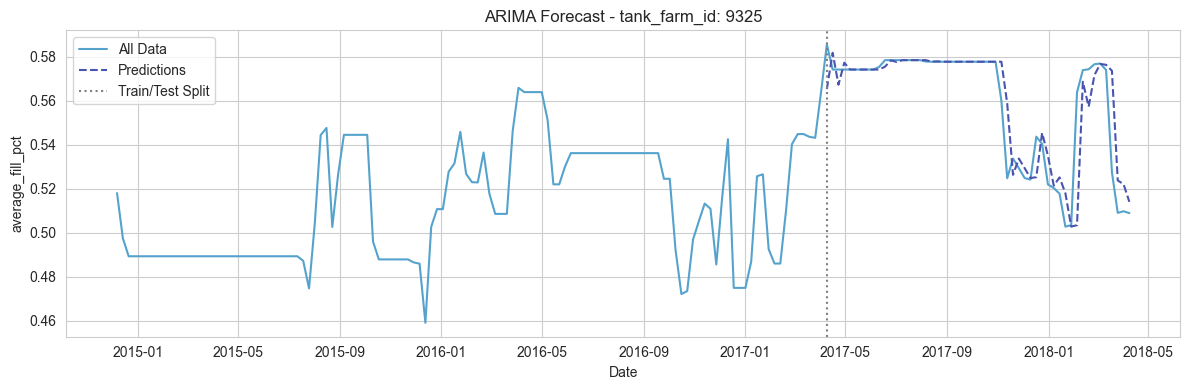

[tank_farm_id = 9123] MSE: 0.0007, RMSE: 0.0259, MAE: 0.0155


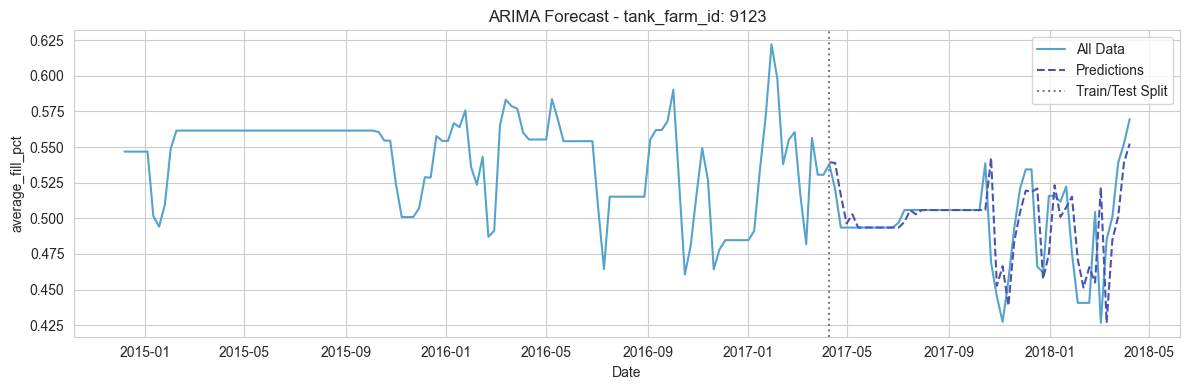

[tank_farm_id = 8847] MSE: 0.0008, RMSE: 0.0279, MAE: 0.0151


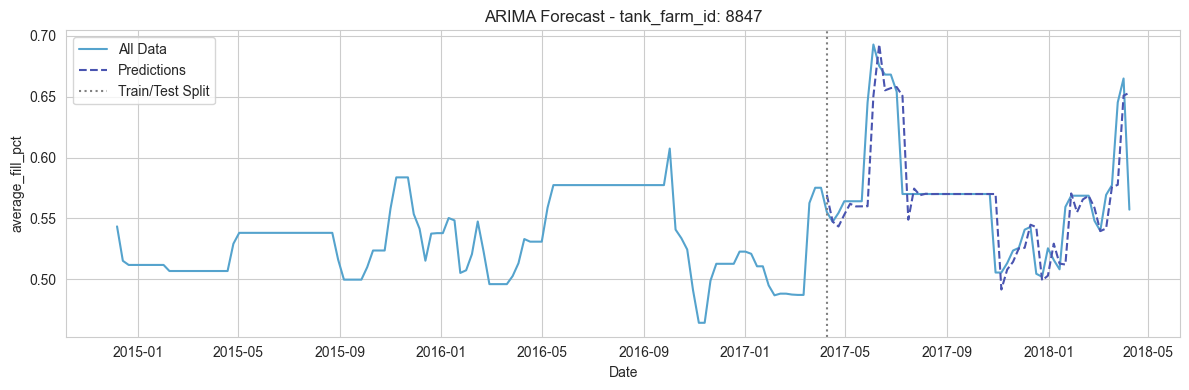

[tank_farm_id = 9648] MSE: 0.0005, RMSE: 0.0233, MAE: 0.0101


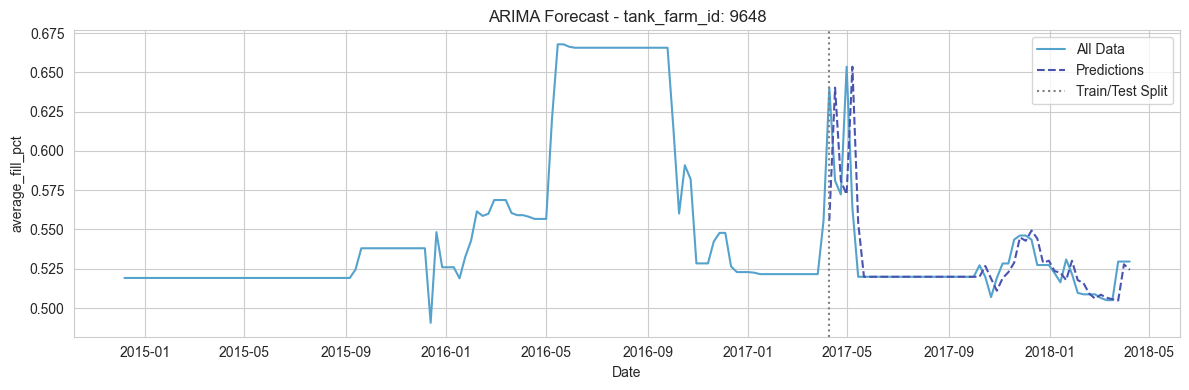

[tank_farm_id = 8346] MSE: 0.0019, RMSE: 0.0436, MAE: 0.0200


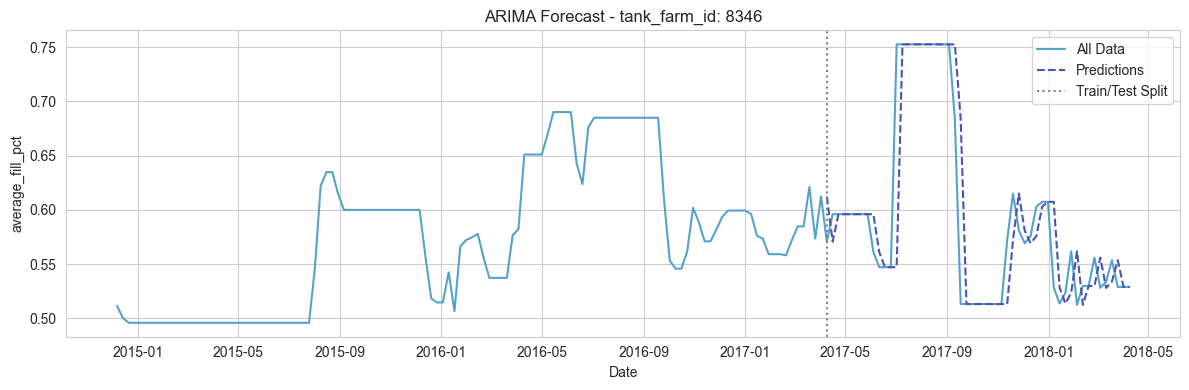

[tank_farm_id = 9456] MSE: 0.0012, RMSE: 0.0339, MAE: 0.0238


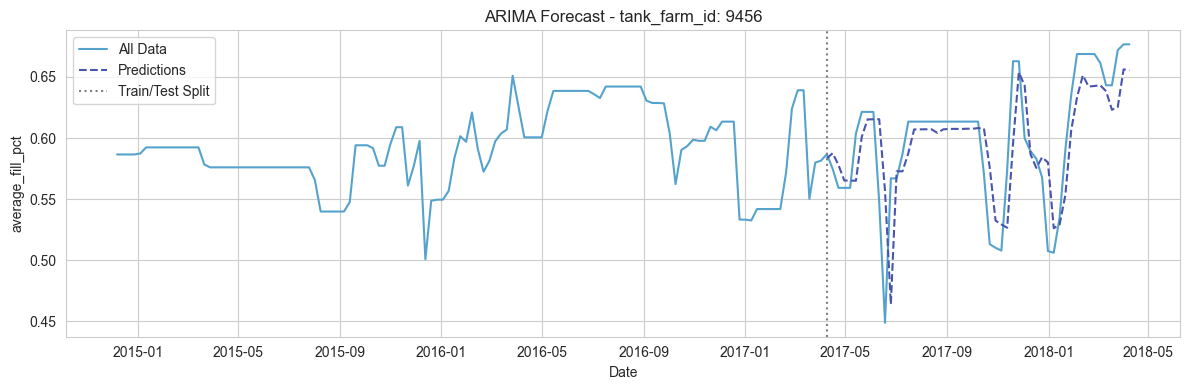

[tank_farm_id = 8723] MSE: 0.0004, RMSE: 0.0190, MAE: 0.0106


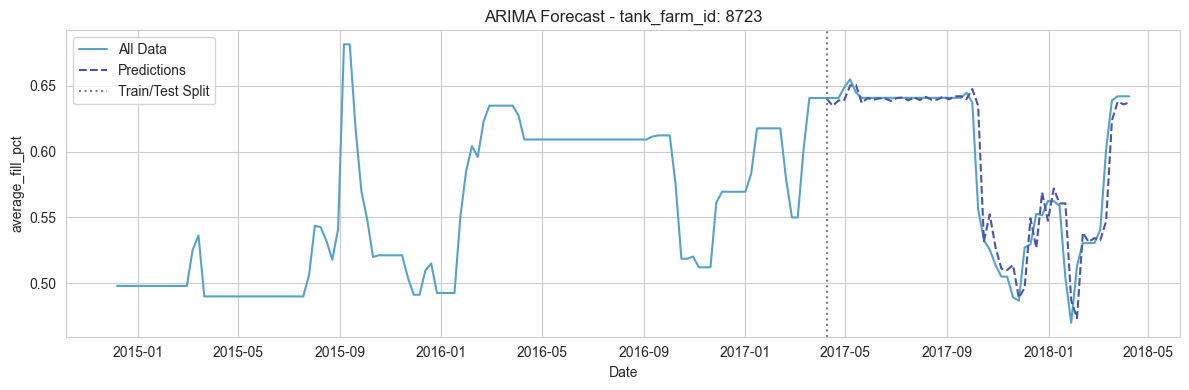

[tank_farm_id = 9597] MSE: 0.0005, RMSE: 0.0229, MAE: 0.0121


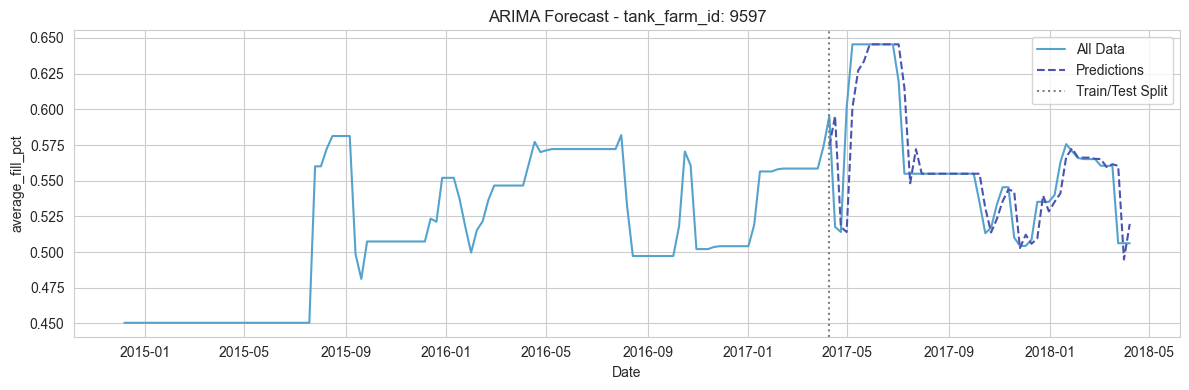

[tank_farm_id = 9294] MSE: 0.0011, RMSE: 0.0339, MAE: 0.0180


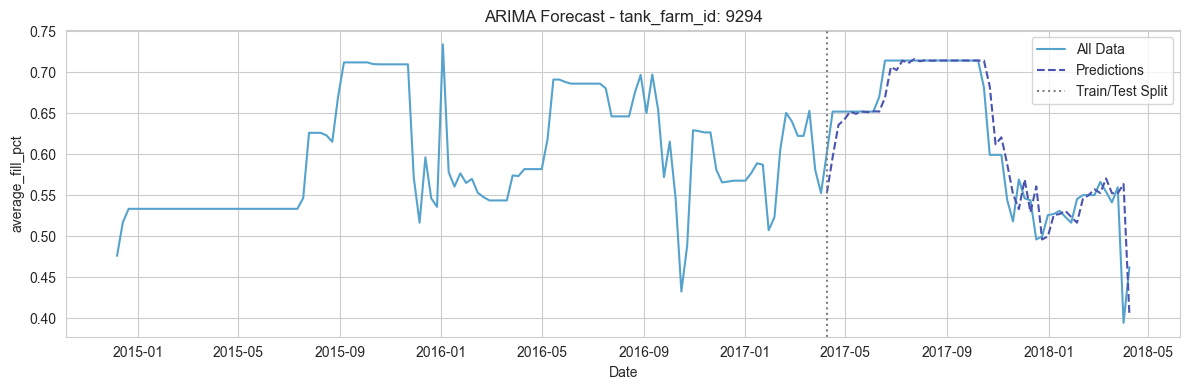

[tank_farm_id = 9457] MSE: 0.0004, RMSE: 0.0207, MAE: 0.0121


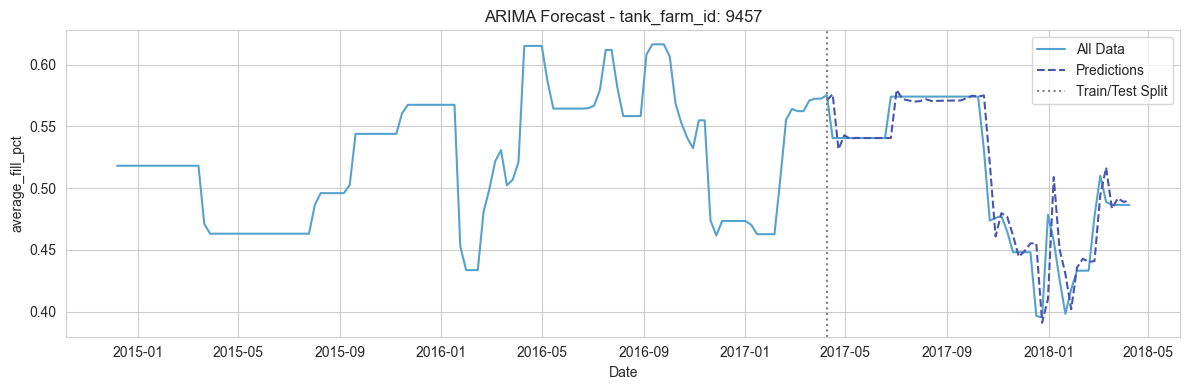

tank_farm_id       mse      rmse       mae
0           8816  0.000615  0.024792  0.014075
1           8426  0.000408  0.020197  0.009180
2           9526  0.000522  0.022851  0.012462
3           9325  0.000179  0.013367  0.006460
4           9123  0.000672  0.025927  0.015532
5           8847  0.000779  0.027909  0.015146
6           9648  0.000542  0.023277  0.010135
7           8346  0.001899  0.043577  0.019997
8           9456  0.001151  0.033928  0.023760
9           8723  0.000363  0.019046  0.010583
10          9597  0.000524  0.022881  0.012149
11          9294  0.001147  0.033868  0.018045
12          9457  0.000428  0.020685  0.012136

In [66]:
# conduct the model
results = []

for tank_id in qualified_tank_ids:
    result = run_arima_forecast(df_weekly, tank_id, plot=True)  # 可设置 plot=True 看图
    if result:
        results.append(result)

# result
results_df = pd.DataFrame(results)
results_df

In [67]:
results_df

tank_farm_id       mse      rmse       mae
0           8816  0.000615  0.024792  0.014075
1           8426  0.000408  0.020197  0.009180
2           9526  0.000522  0.022851  0.012462
3           9325  0.000179  0.013367  0.006460
4           9123  0.000672  0.025927  0.015532
5           8847  0.000779  0.027909  0.015146
6           9648  0.000542  0.023277  0.010135
7           8346  0.001899  0.043577  0.019997
8           9456  0.001151  0.033928  0.023760
9           8723  0.000363  0.019046  0.010583
10          9597  0.000524  0.022881  0.012149
11          9294  0.001147  0.033868  0.018045
12          9457  0.000428  0.020685  0.012136